In [1]:
#Import of libraries
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# DEBUG: Test version
print(nx.__version__)

2.7.1


----
# 1. Define setup 
In this part, we define the variables used for controlling the application. By doing this, we are trying to make sure that we don't have to modify the rest of the code.

In [3]:
# Define for which euclidian distances (in meters) the near-repeat networks should be created
proximity_distance = [
    200,
    300,
    400
]

# Define for which period (in days) the near-repeat networks should be created
proximity_time = [
    14
]

# Define which types of crimes should be analysed
crime_groups = [
    'burglary_residence',
    'burglary_business'
]

# A list of network properties we want to investigate
list_network_properties_headers = [
    'centrality',
    'centrality_degree',
    'centrality_eigenvector',
    'centrality_closeness',
    'centrality_betweenness',
    'clustering_coefficient',
    'assortativity'
]

PATH_TO_DATA = '../assets/data/prepared/denver_prepared.csv'  # Change if needed

In [51]:
# dict used to store a nx graph for each dimension
dict_graph = {}
# used for combined graphs (one distance / one crime / all)
dict_graph_combined = {}

In [52]:
#used to cache dict_graph during testing
dict_graph_test = {}

In [47]:
# Setup for networks
nodesize = 75
width = 1
figsize_width = 40
figsize_height = 30
label = False
fontsize = 45

In [4]:
# define helper function for coloring in nodes based on crime type
def create_color_map(G):
    color_map = []
    
    for node in G:
        temp = df.loc[df['id'] == node].crime.values[0]
        if temp == 'burglary_residence':
            color_map_2.append('blue')
        elif temp == 'burglary_business': 
            color_map_2.append('green')
        else:
            color_map_2.append('red')
    

----
# 2. Data import
Load the data set, that was prepared in '1_data_prep'

In [5]:
df = pd.read_csv(PATH_TO_DATA, delimiter=',')
df.head(5)

id                   crime_type crime_cat  district  precinct  \
0  20162874   burglary-business-by-force  burglary         2       222   
1  20166879  burglary-residence-no-force  burglary         3       322   
2  20163184   burglary-business-by-force  burglary         6       611   
3  20164917  burglary-residence-by-force  burglary         3       322   
4  20163610  burglary-residence-by-force  burglary         3       321   

               neighborhood            timestamp        long        lat  \
0                 montclair  2016-01-02 05:00:00 -104.914776  39.737851   
1  washington-virginia-vale  2016-01-02 08:35:00 -104.909504  39.691124   
2                       cbd  2016-01-02 13:38:00 -104.995367  39.741134   
3          virginia-village  2016-01-02 17:00:00 -104.904795  39.681983   
4                   hilltop  2016-01-02 17:55:00 -104.928957  39.720677   

                crime  ... day14_300m  day14_300m_mintindex  \
0   burglary_business  ...          0                     0   
1  burglary_residence  ...          0                     0   
2   burglary_business  ...          0                     0   
3  burglary_residence  ...          0                     0   
4  burglary_residence  ...          0                     0   

   day14_300m_mintindex_mentions  day14_300m_mintdate day14_300m_mintdatediff  \
0                              0                  NaN                       0   
1                              0                  NaN                       0   
2                              0                  NaN                       0   
3                              0                  NaN                       0   
4                              0                  NaN                       0   

  day14_400m day14_400m_mintindex  day14_400m_mintindex_mentions  \
0          0                    0                              0   
1          0                    0                              0   
2          0                    0                              0   
3          0                    0                              0   
4          0                    0                              0   

   day14_400m_mintdate  day14_400m_mintdatediff  
0                  NaN                        0  
1                  NaN                        0  
2                  NaN                        0  
3                  NaN                        0  
4                  NaN                        0  

[5 rows x 33 columns]

In [6]:
df['crime'].value_counts()

burglary_residence    15394
burglary_business      7852
burglary_other          378
Name: crime, dtype: int64

----
# 4. Create network models
TODO: description

In [53]:
def draw_network(G, title):
    fig = plt.figure(1, figsize=(figsize_width, figsize_height), dpi=75)
    fig.suptitle(f'{title} (n = {G.number_of_nodes()})', fontsize=60, y=1.1, ha="center")
    
    nx.draw(G, with_labels=label, node_size=nodesize, width=width)
    plt.show()

In [54]:
def draw_network_from_dataframe(df, distance, crime):
    G = nx.Graph()
    
    for index, row in df.iterrows():
        index_row = row['id']
        mintindex_row = row[f'day14_{distance}m_mintindex']
        
        G.add_edge(index_row, mintindex_row)

    dict_graph[f'14d_{crime}_{distance}m'] = G
    title = f'Visualization of {crime} near-repeats within {distance}m and 14 days of initial offense'

    draw_network(G, title)

## 4.1. Create network each crime type and distance

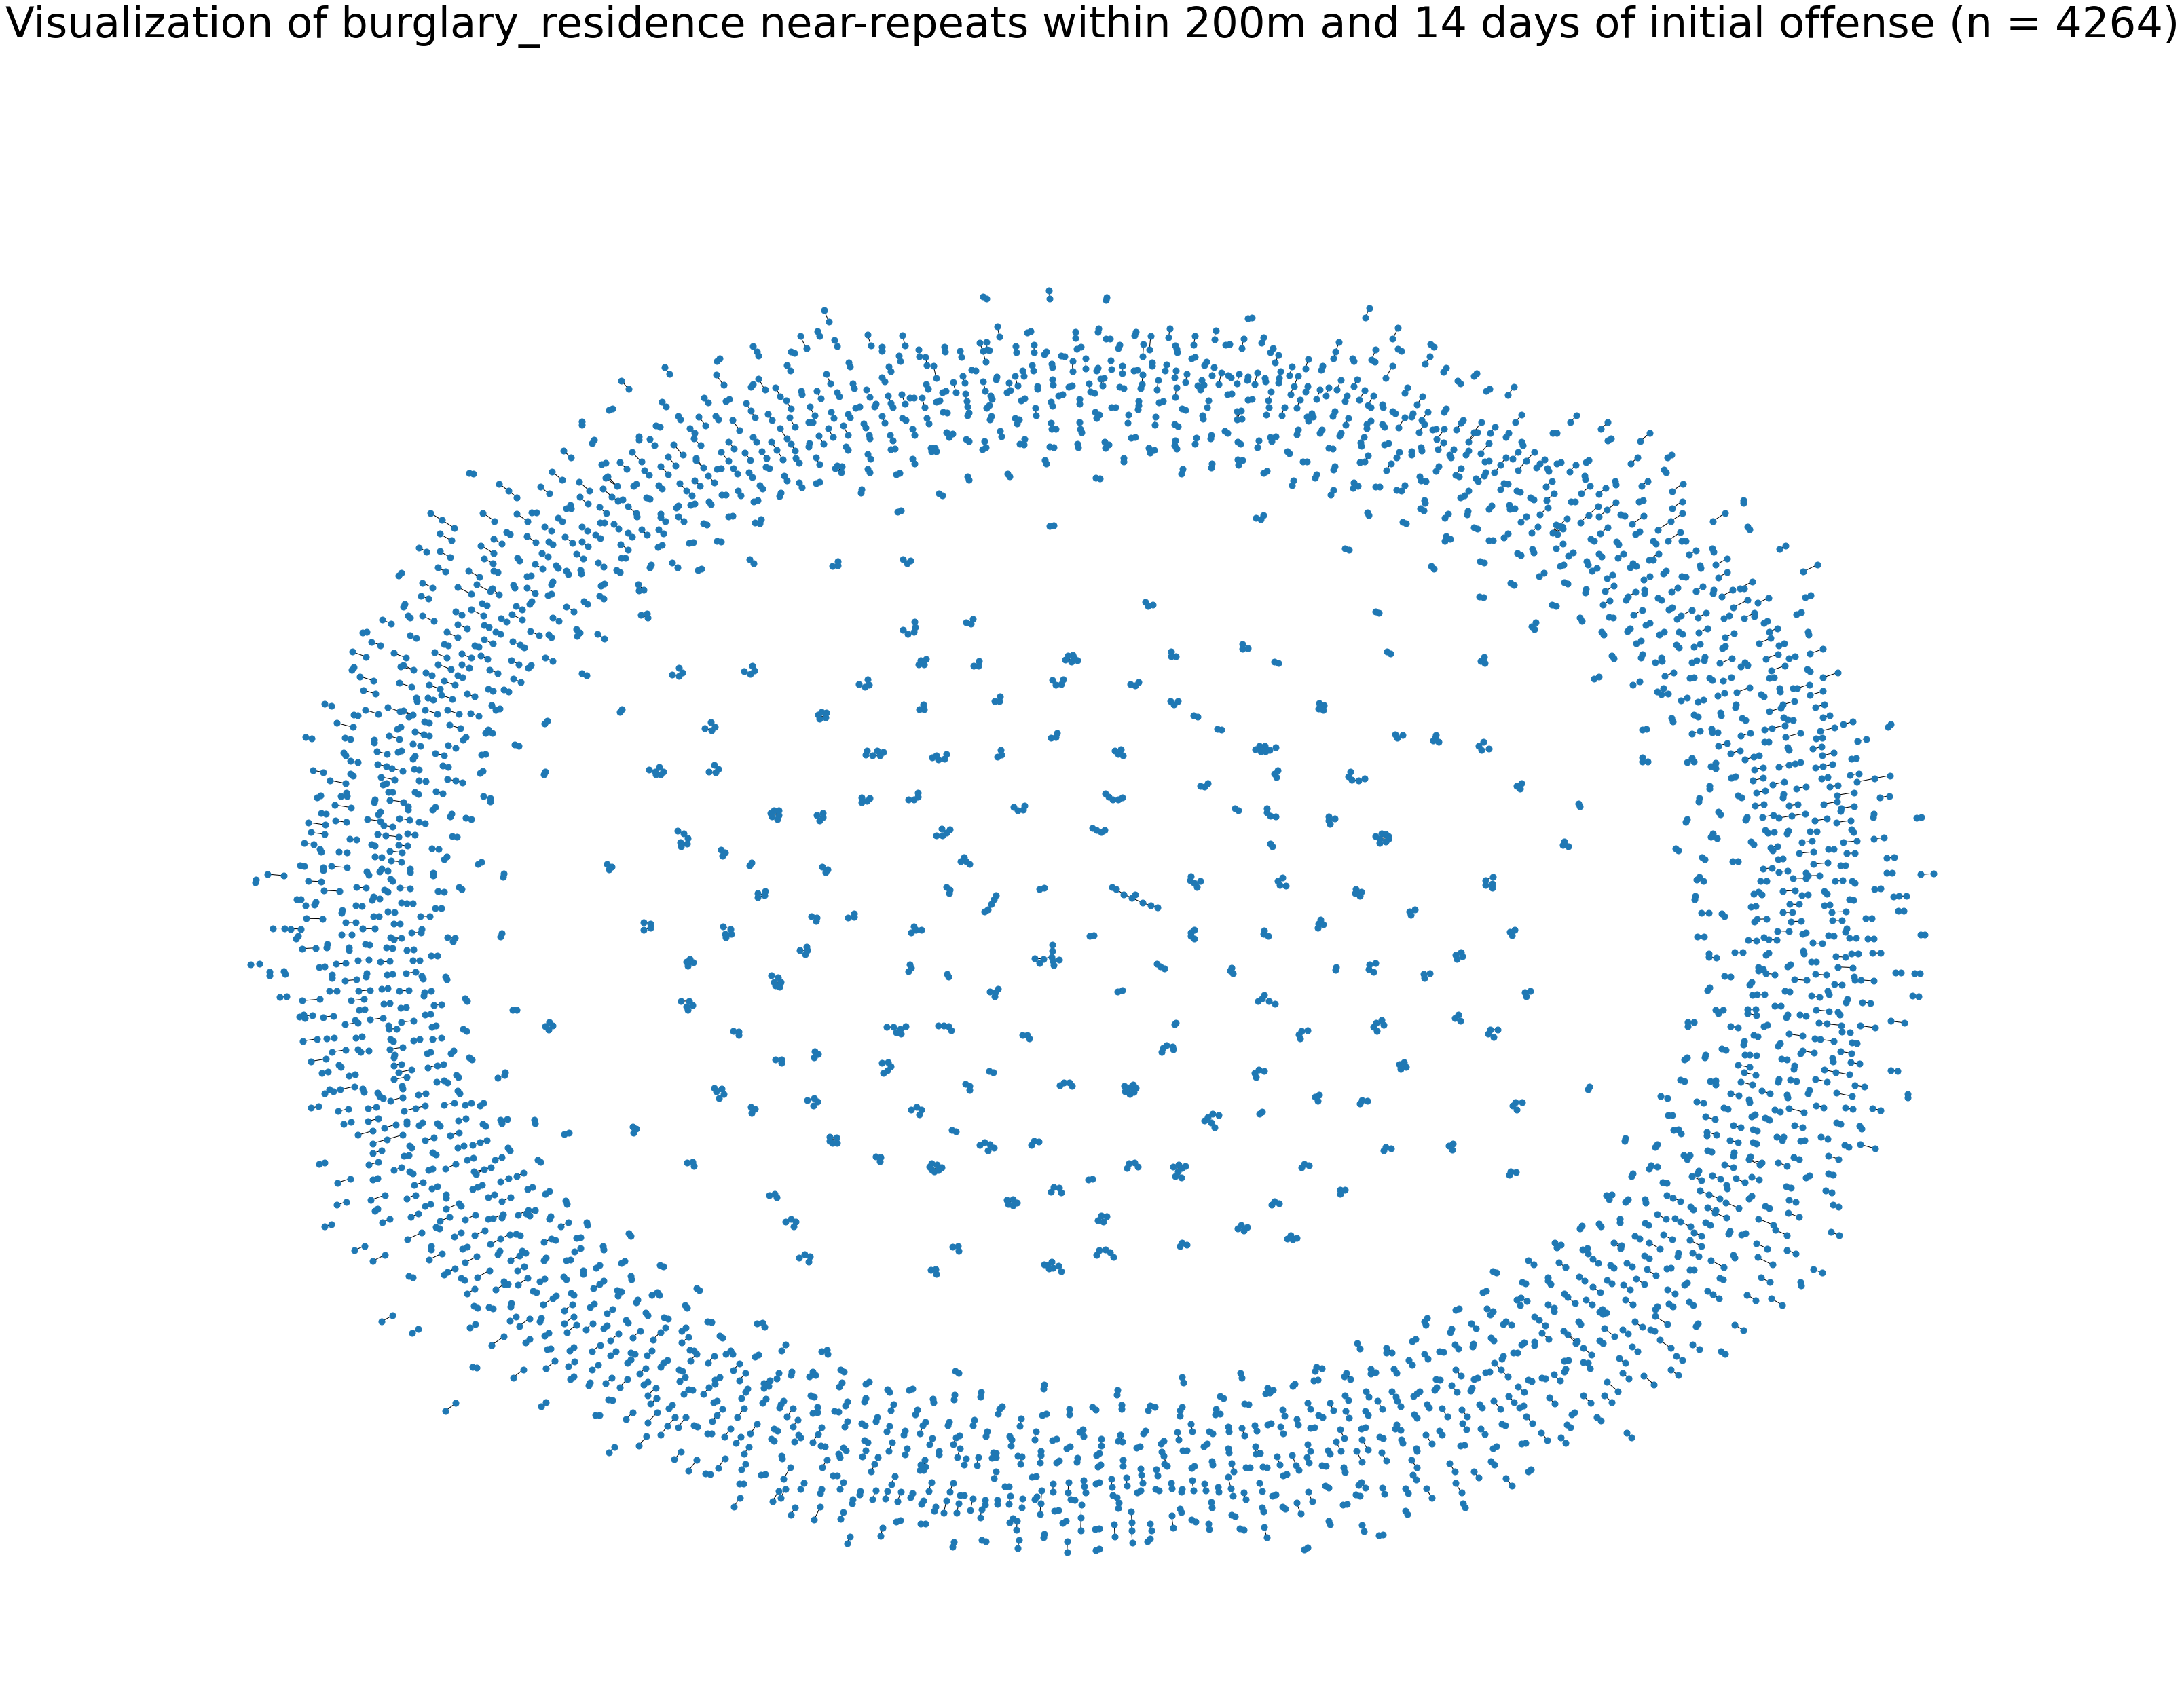

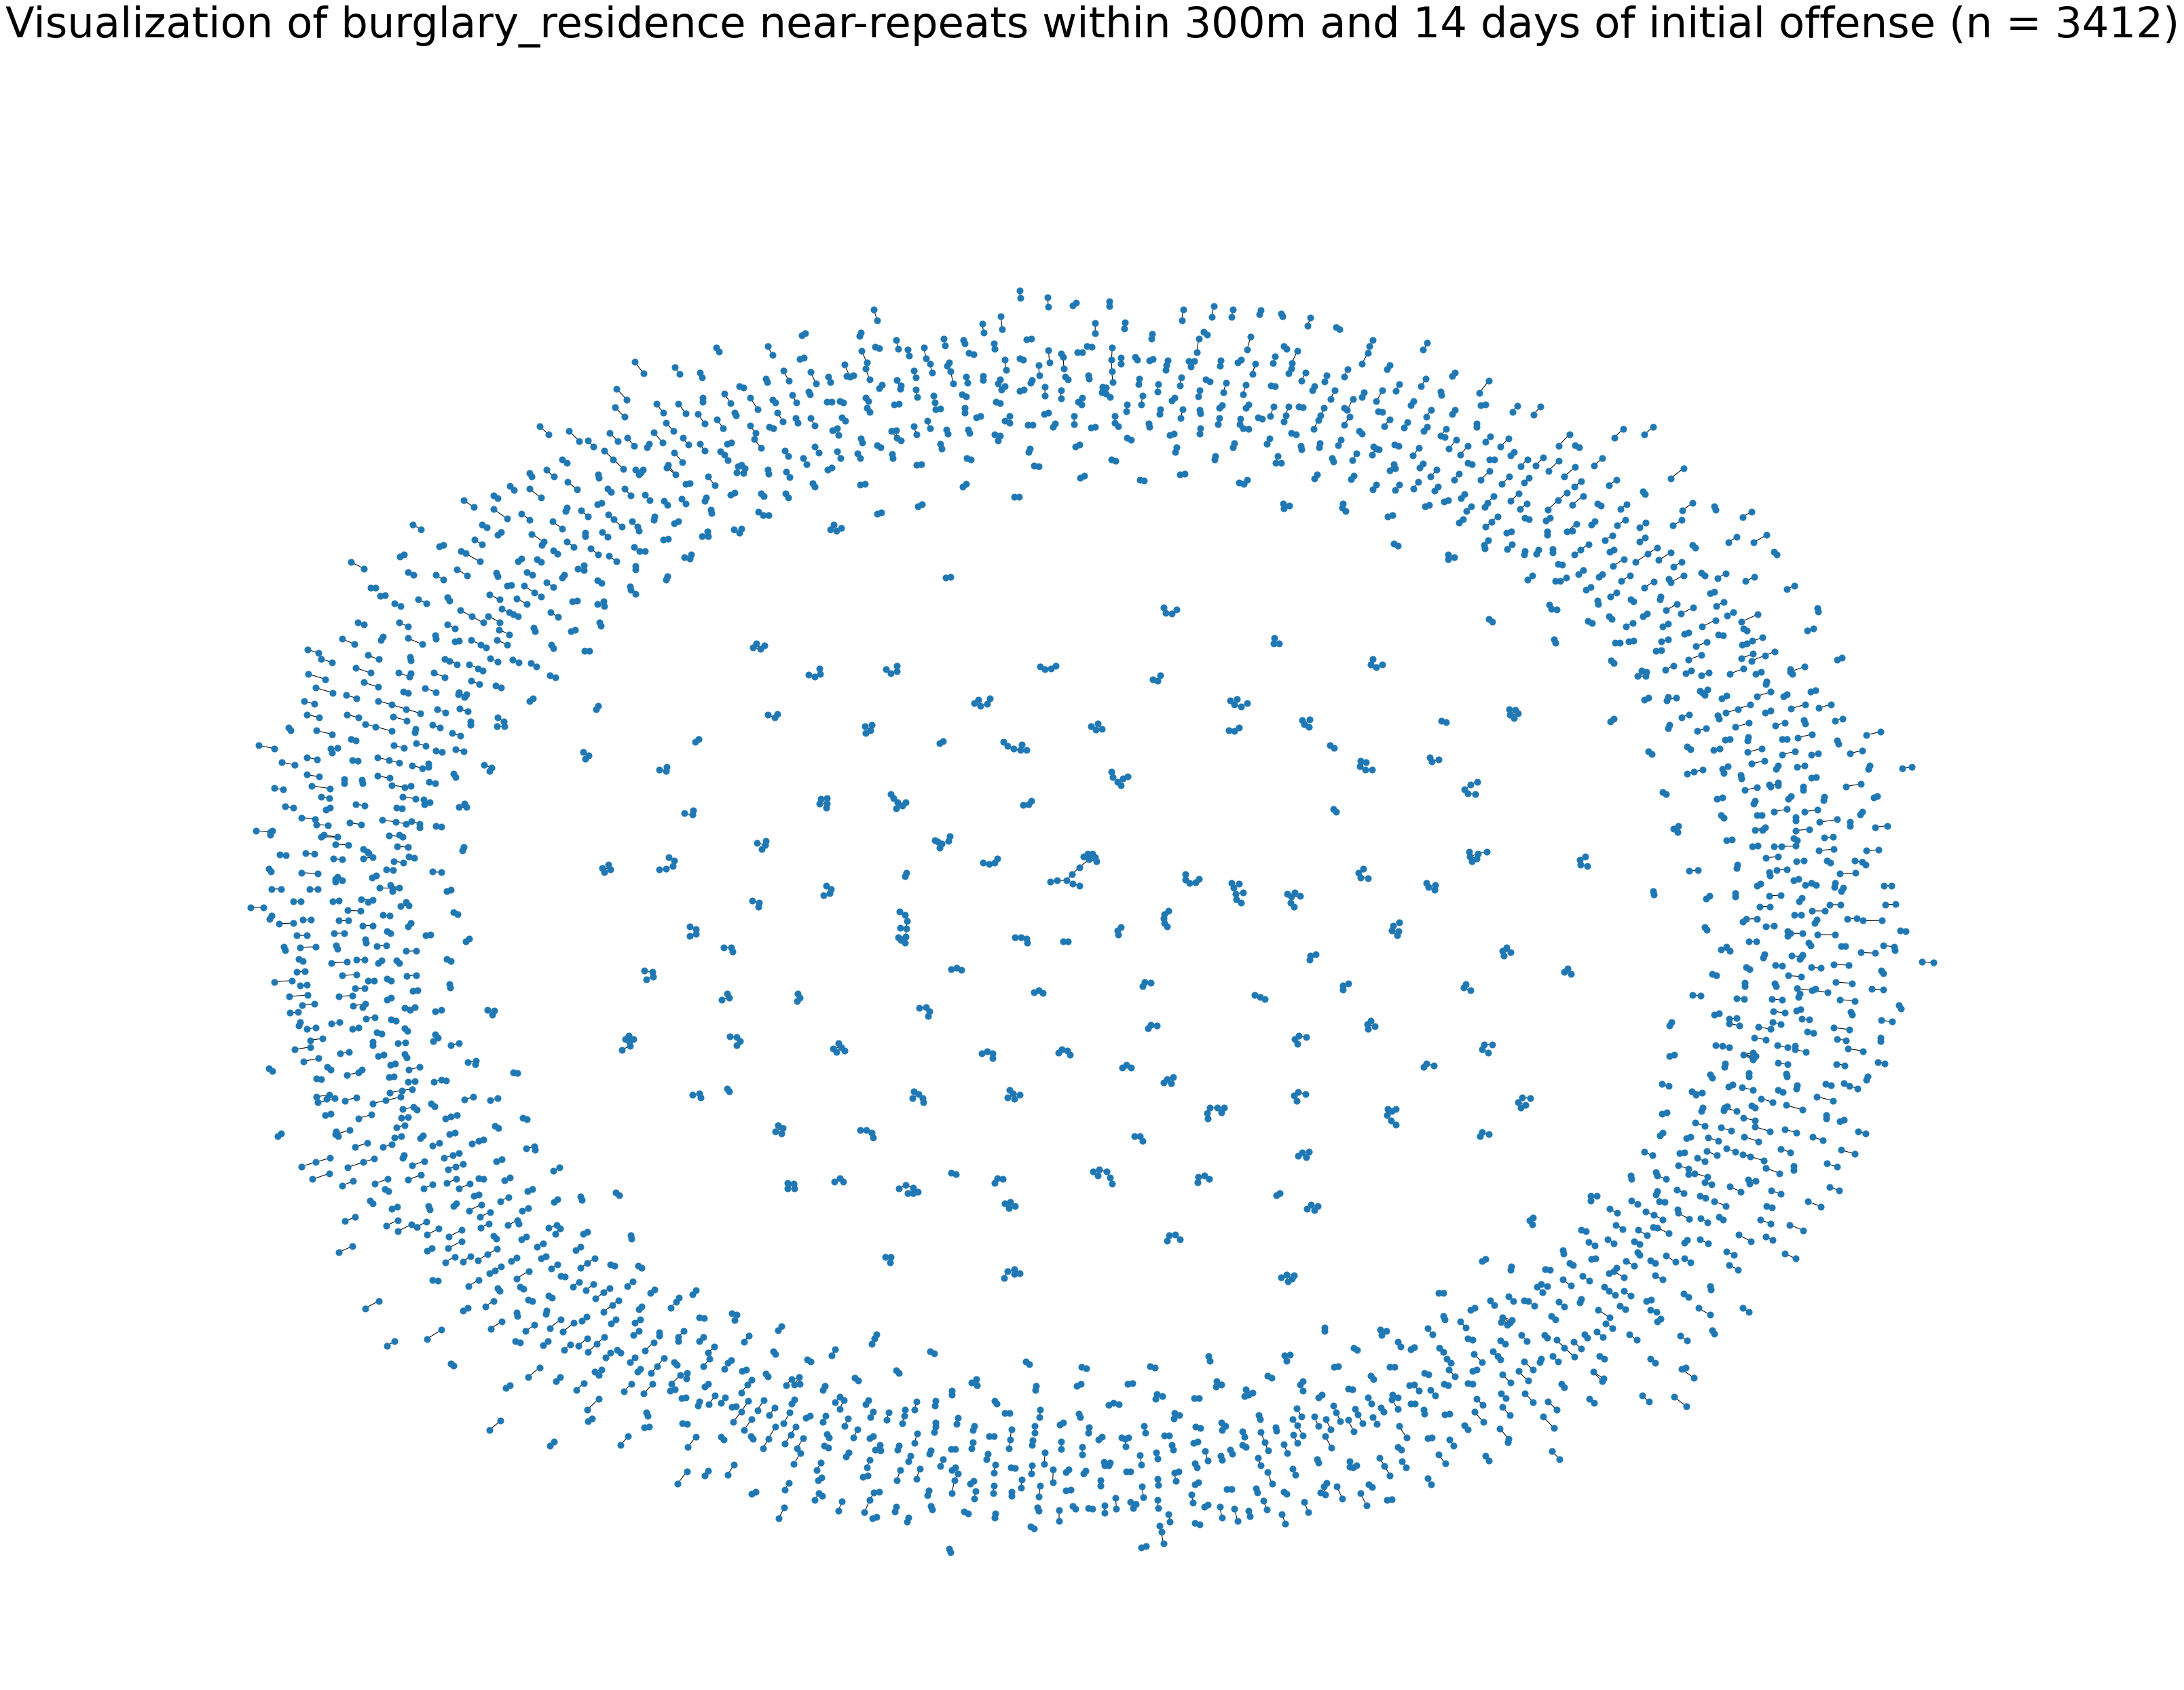

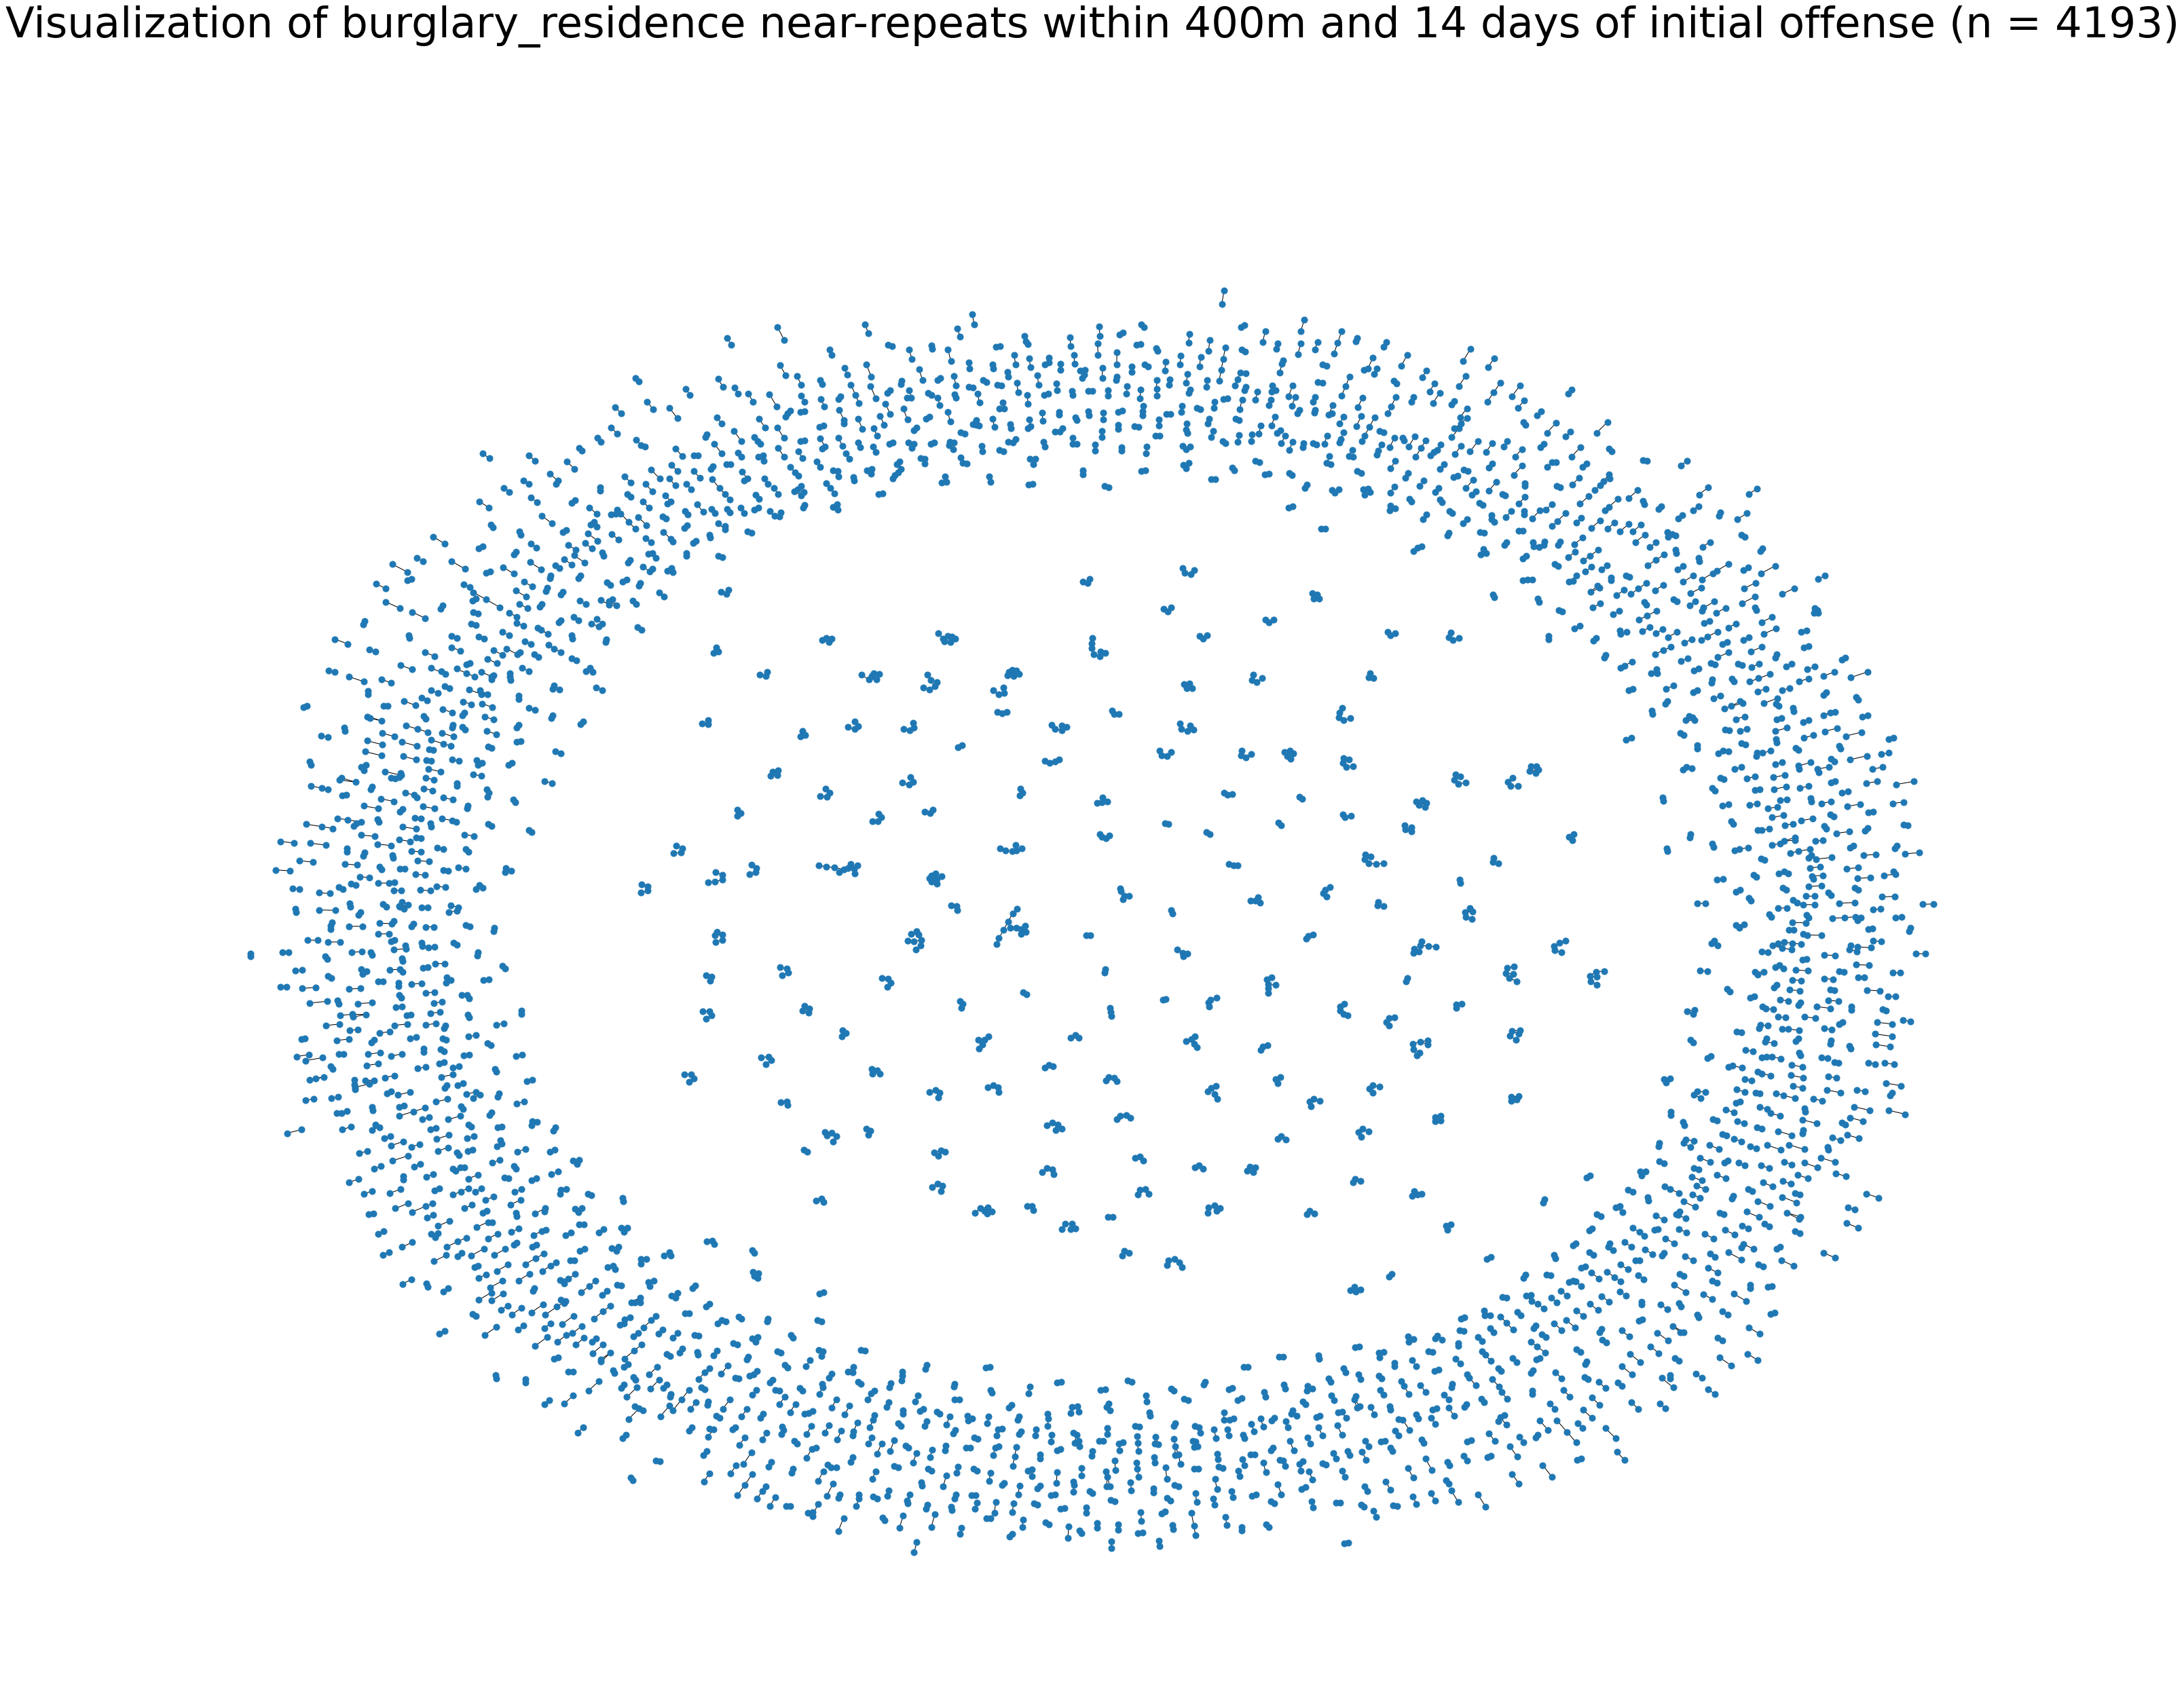

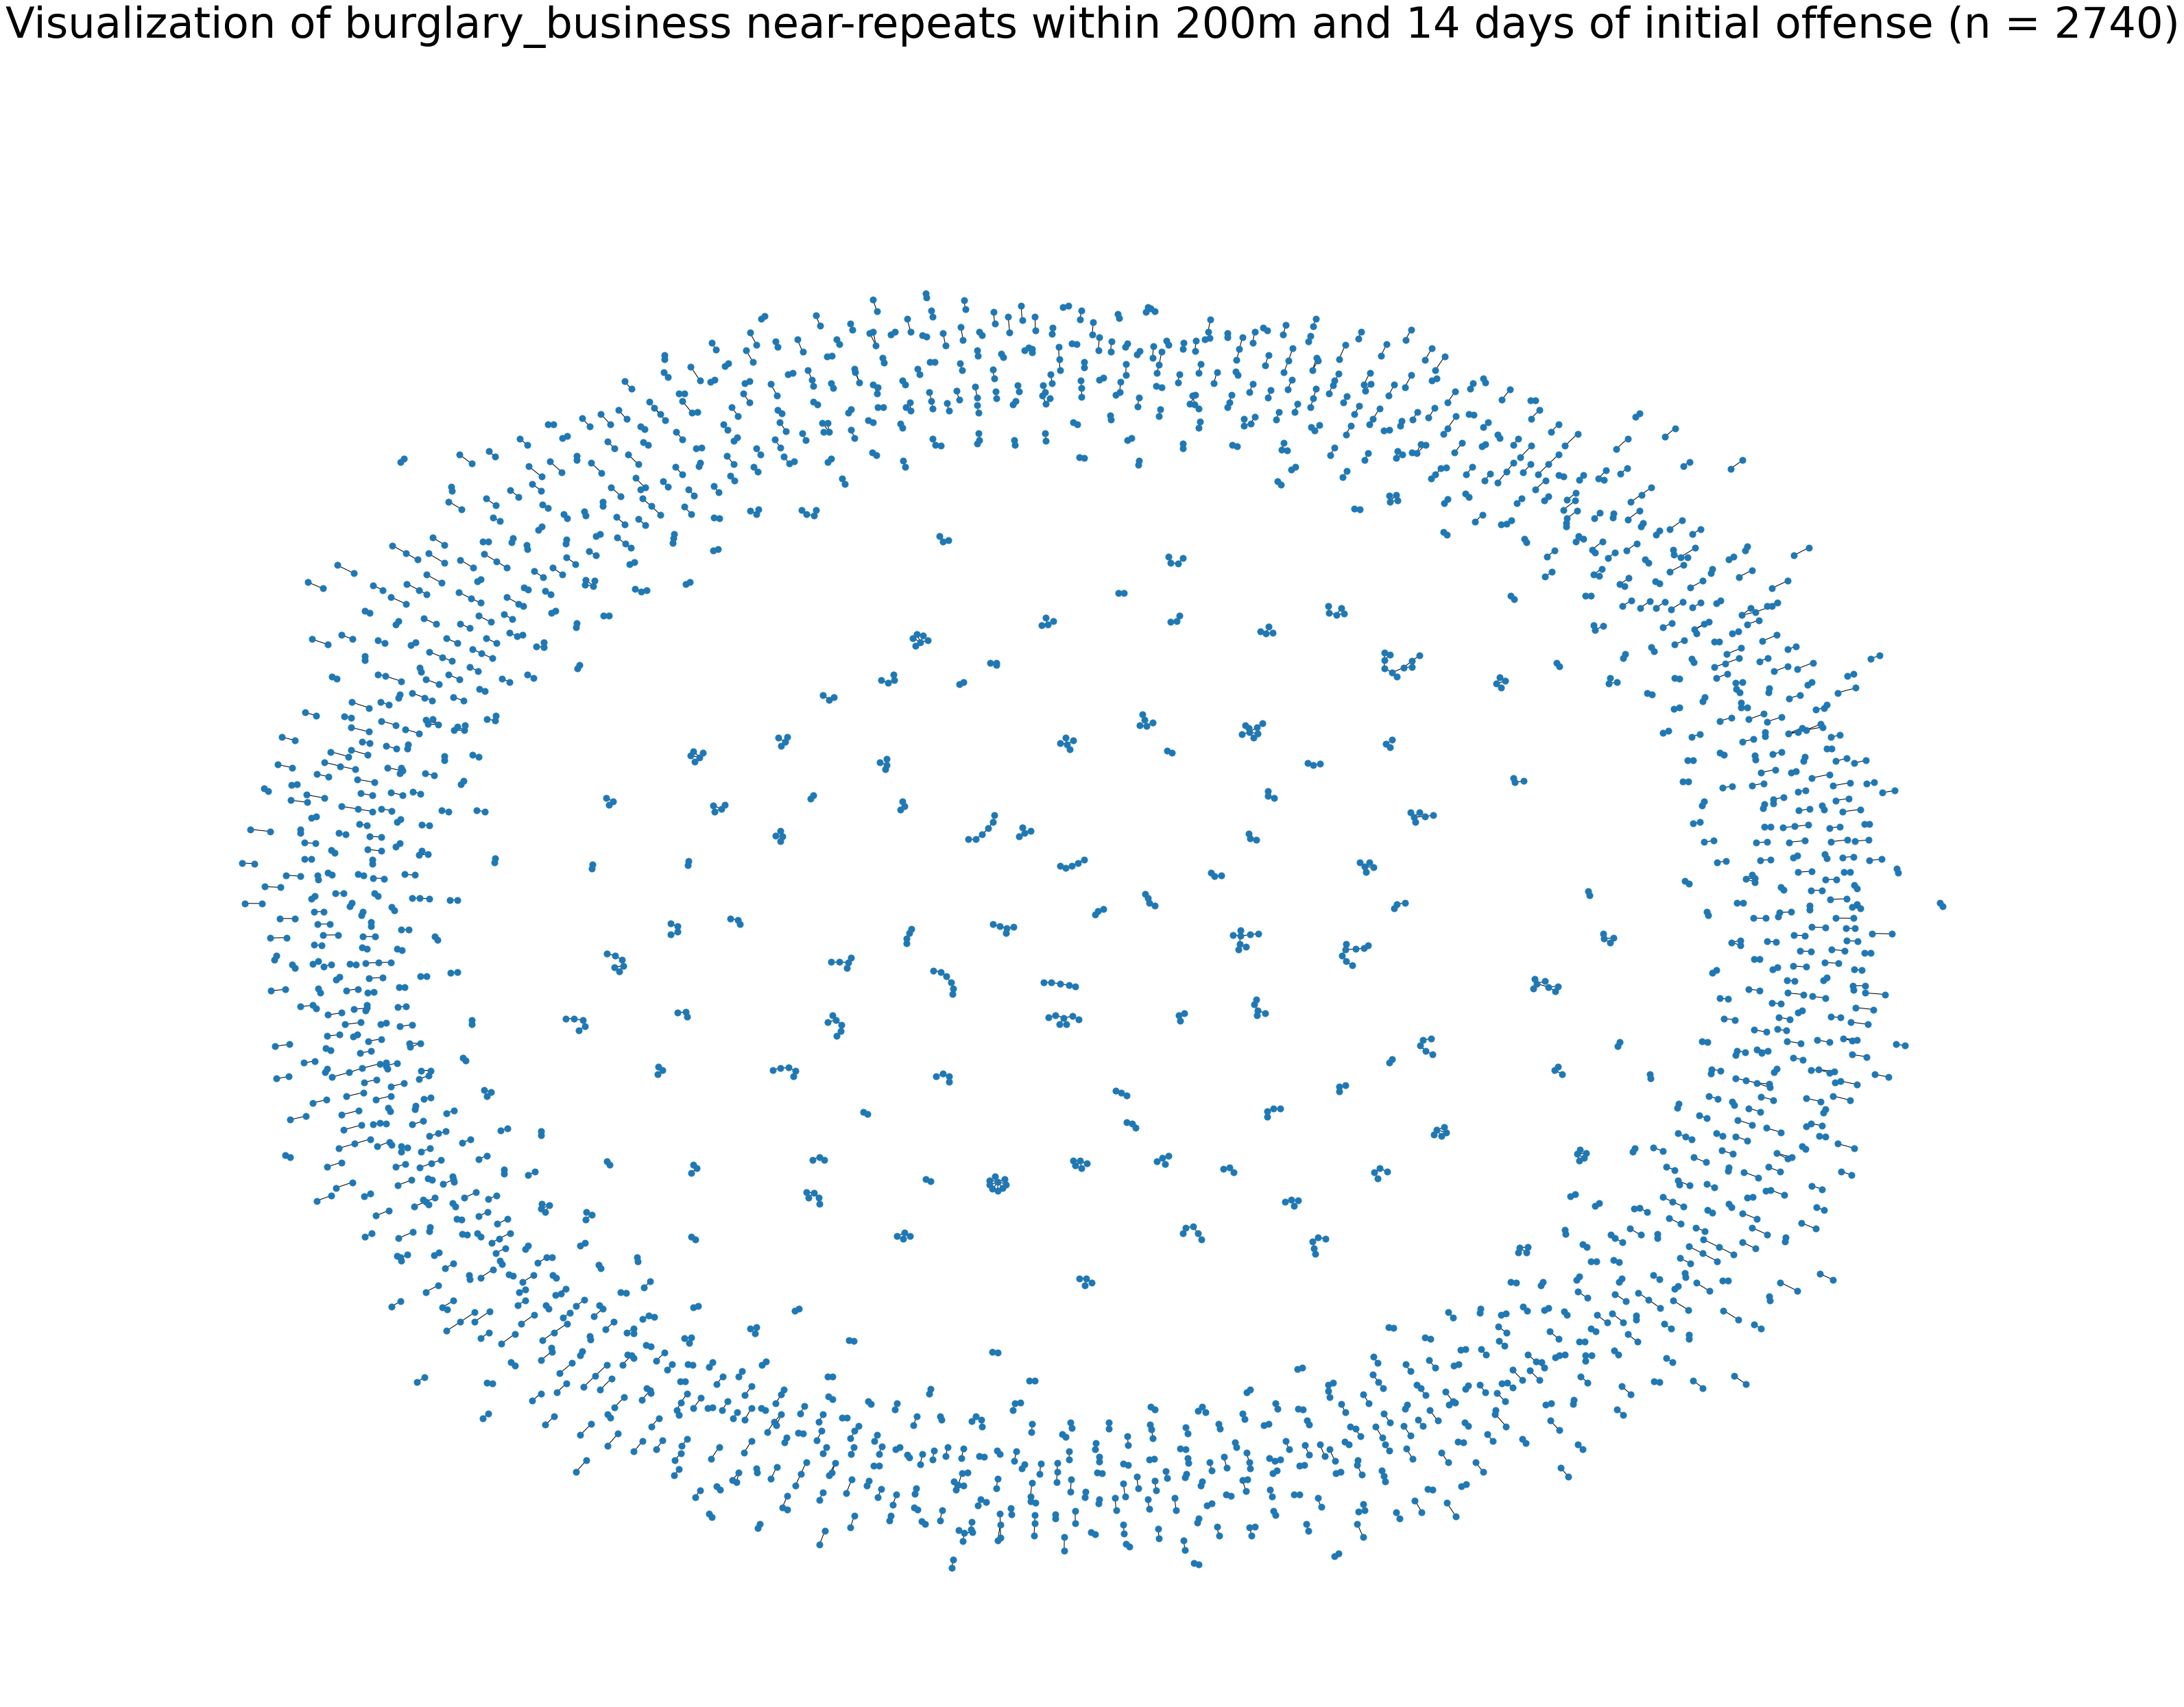

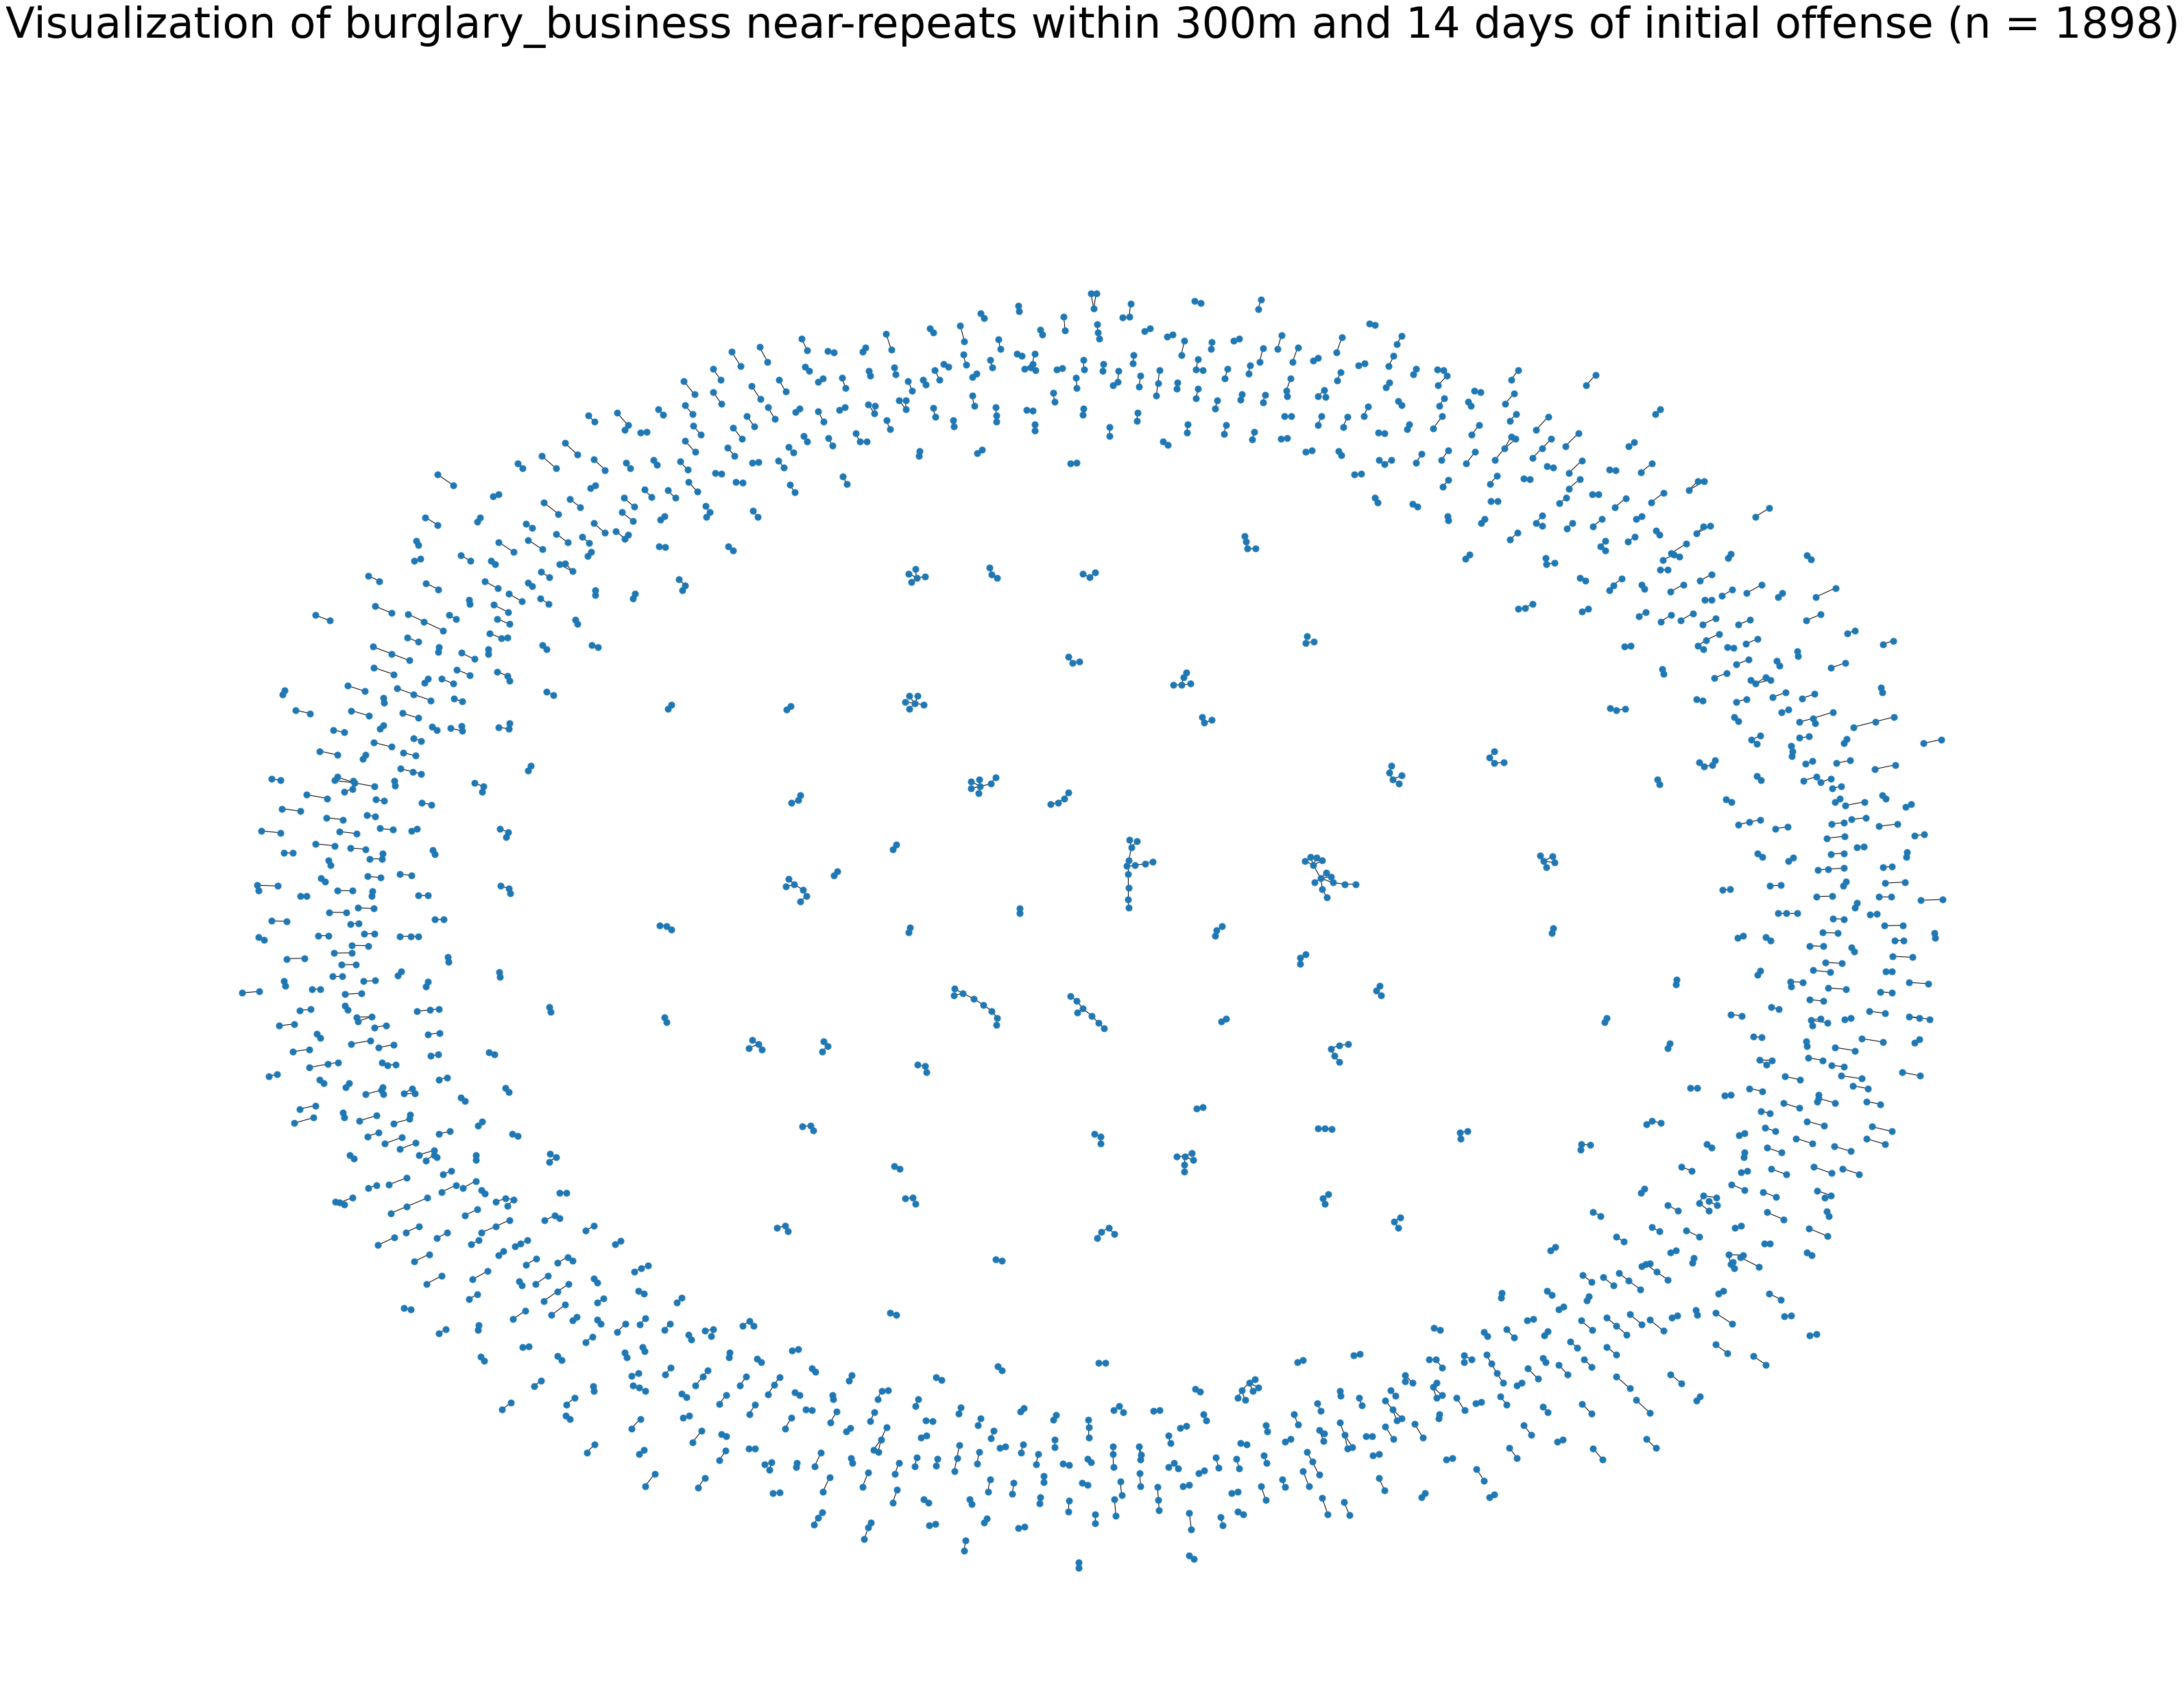

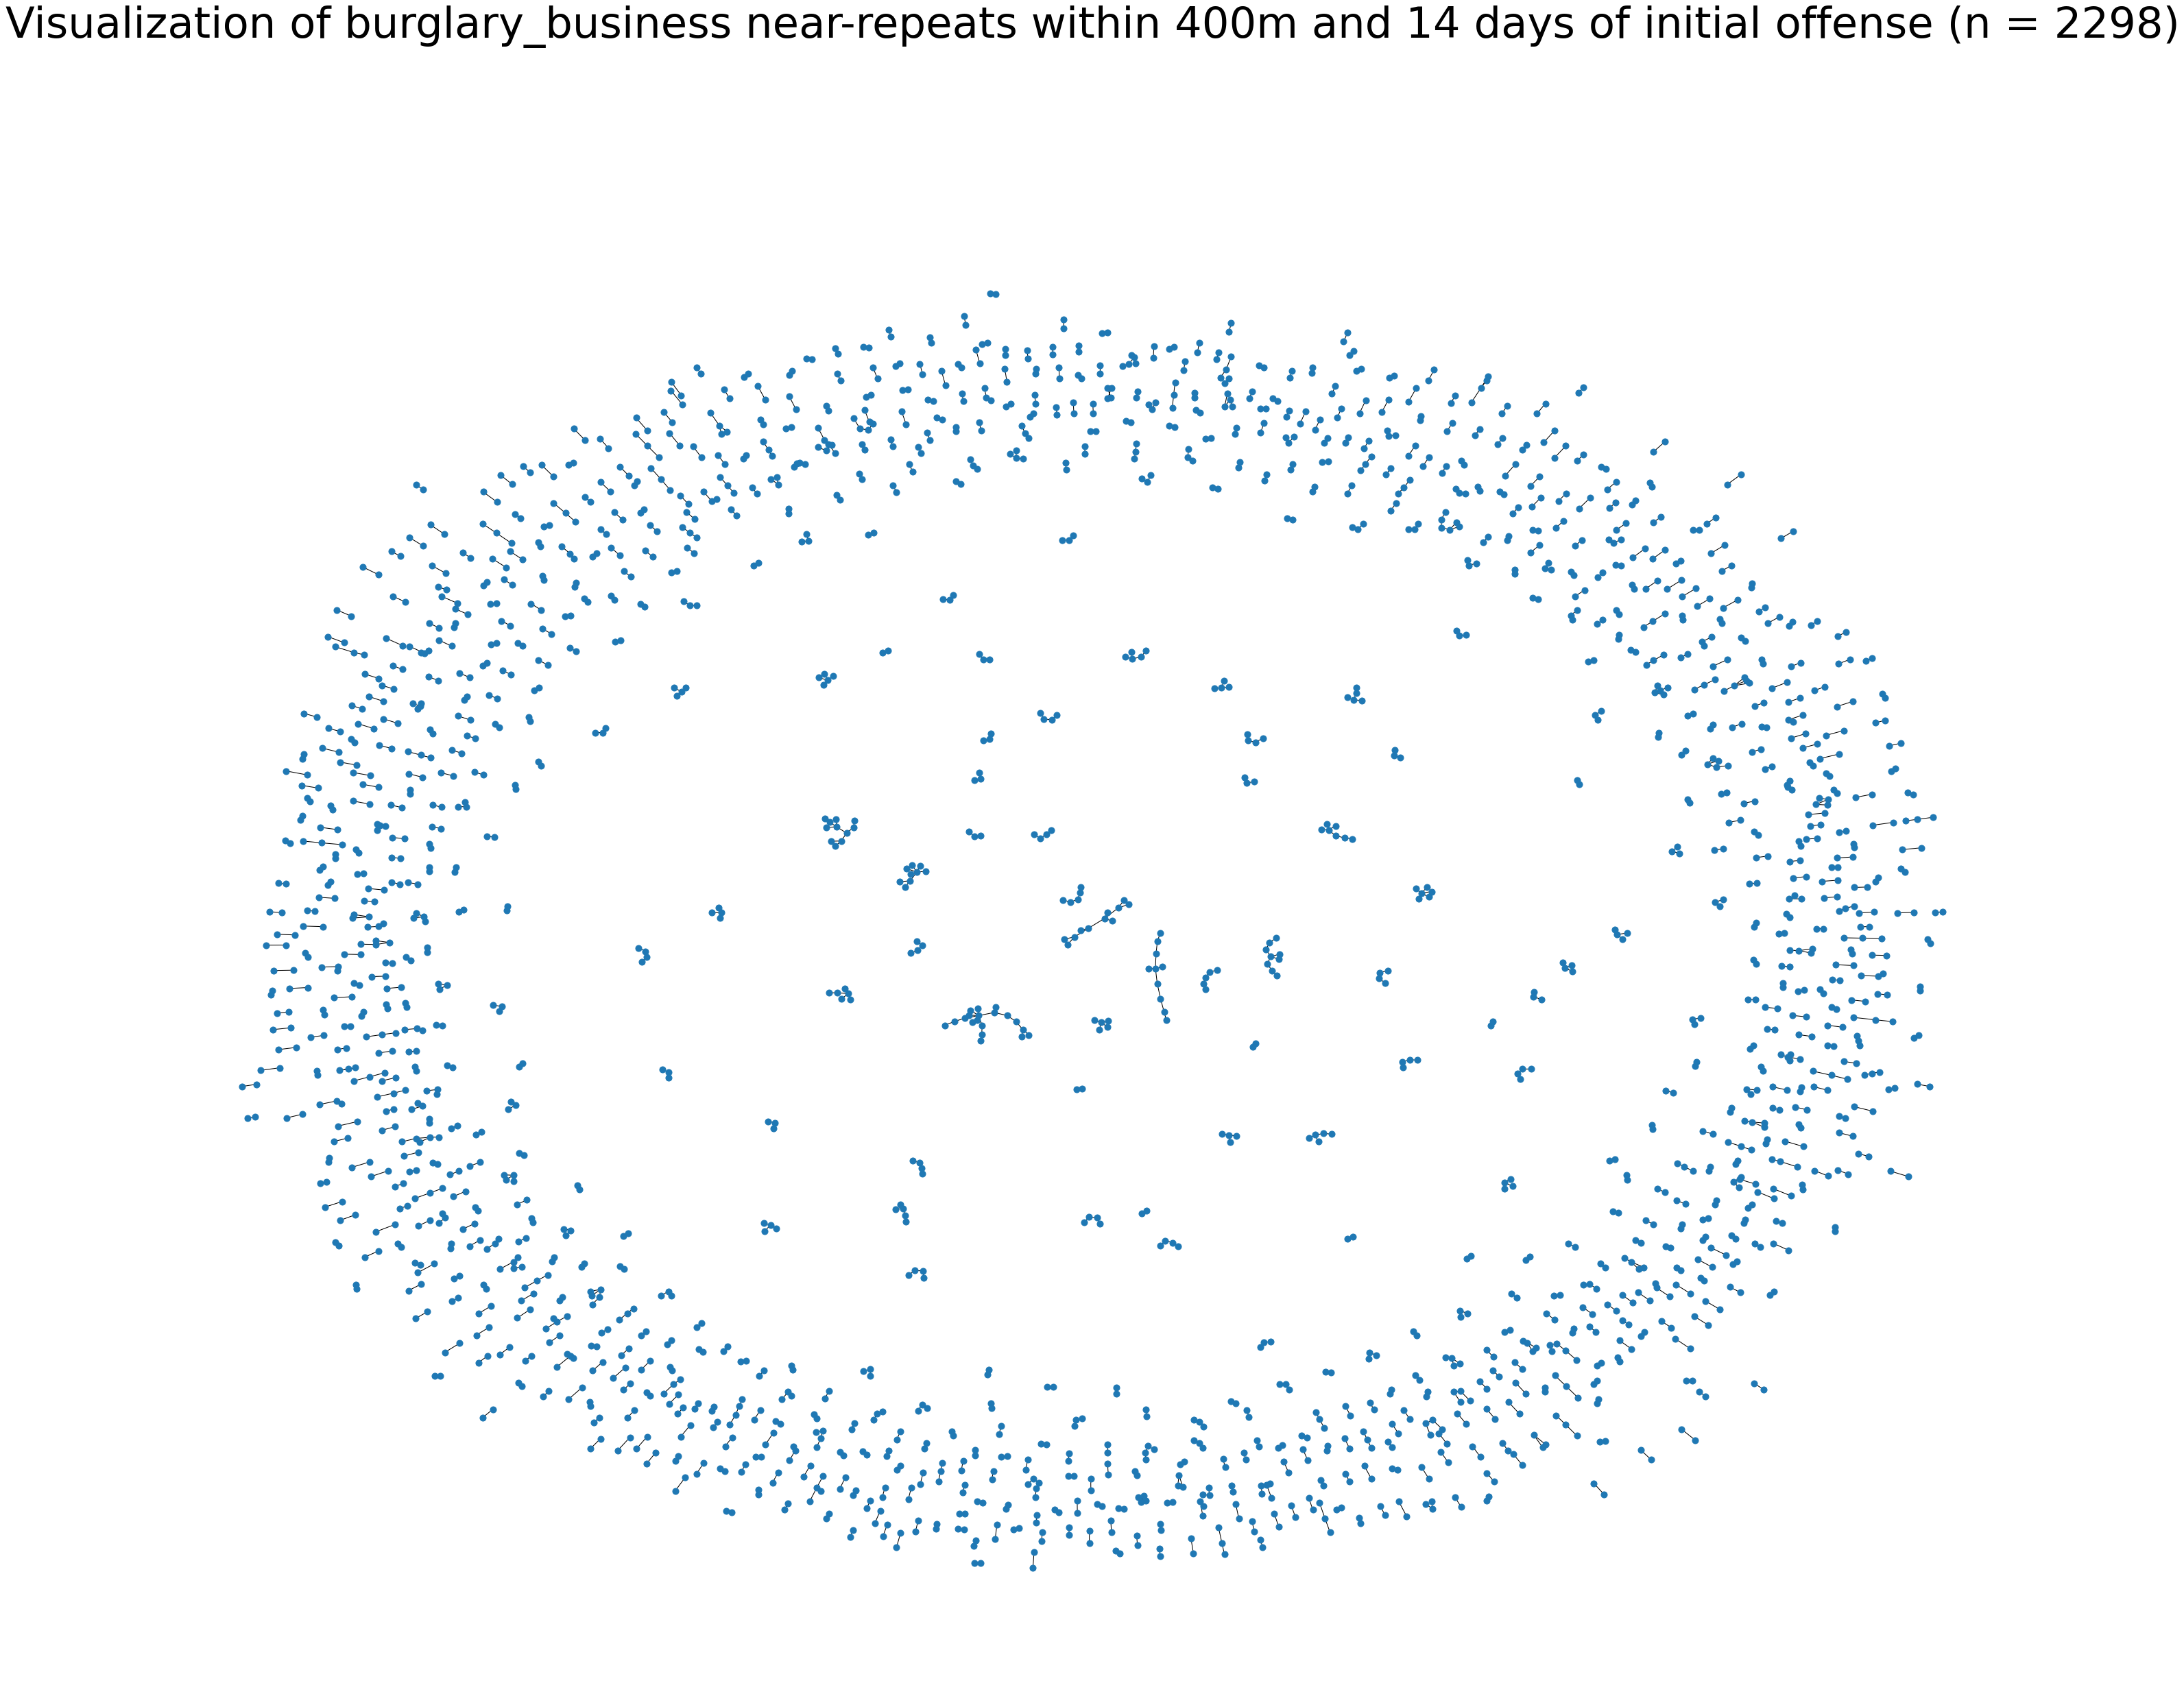

Time elapsed: 208.3105969429016s


In [55]:
# time (mac: ~3-4min | win:)
import time
s = time.time()

for crime in crime_groups:
    for distance in proximity_distance:
        df_in = df.loc[(df['crime'] == crime) & (df[f'day14_{distance}m_mintindex'] > 0)]
        draw_network_from_dataframe(df_in, distance, crime)           
        
e = time.time()
print(f'Time elapsed: {e-s}s')

In [56]:
# DEBUG
dict_graph_test = dict_graph

## 4.2. Create network for each distance
combines all crime types

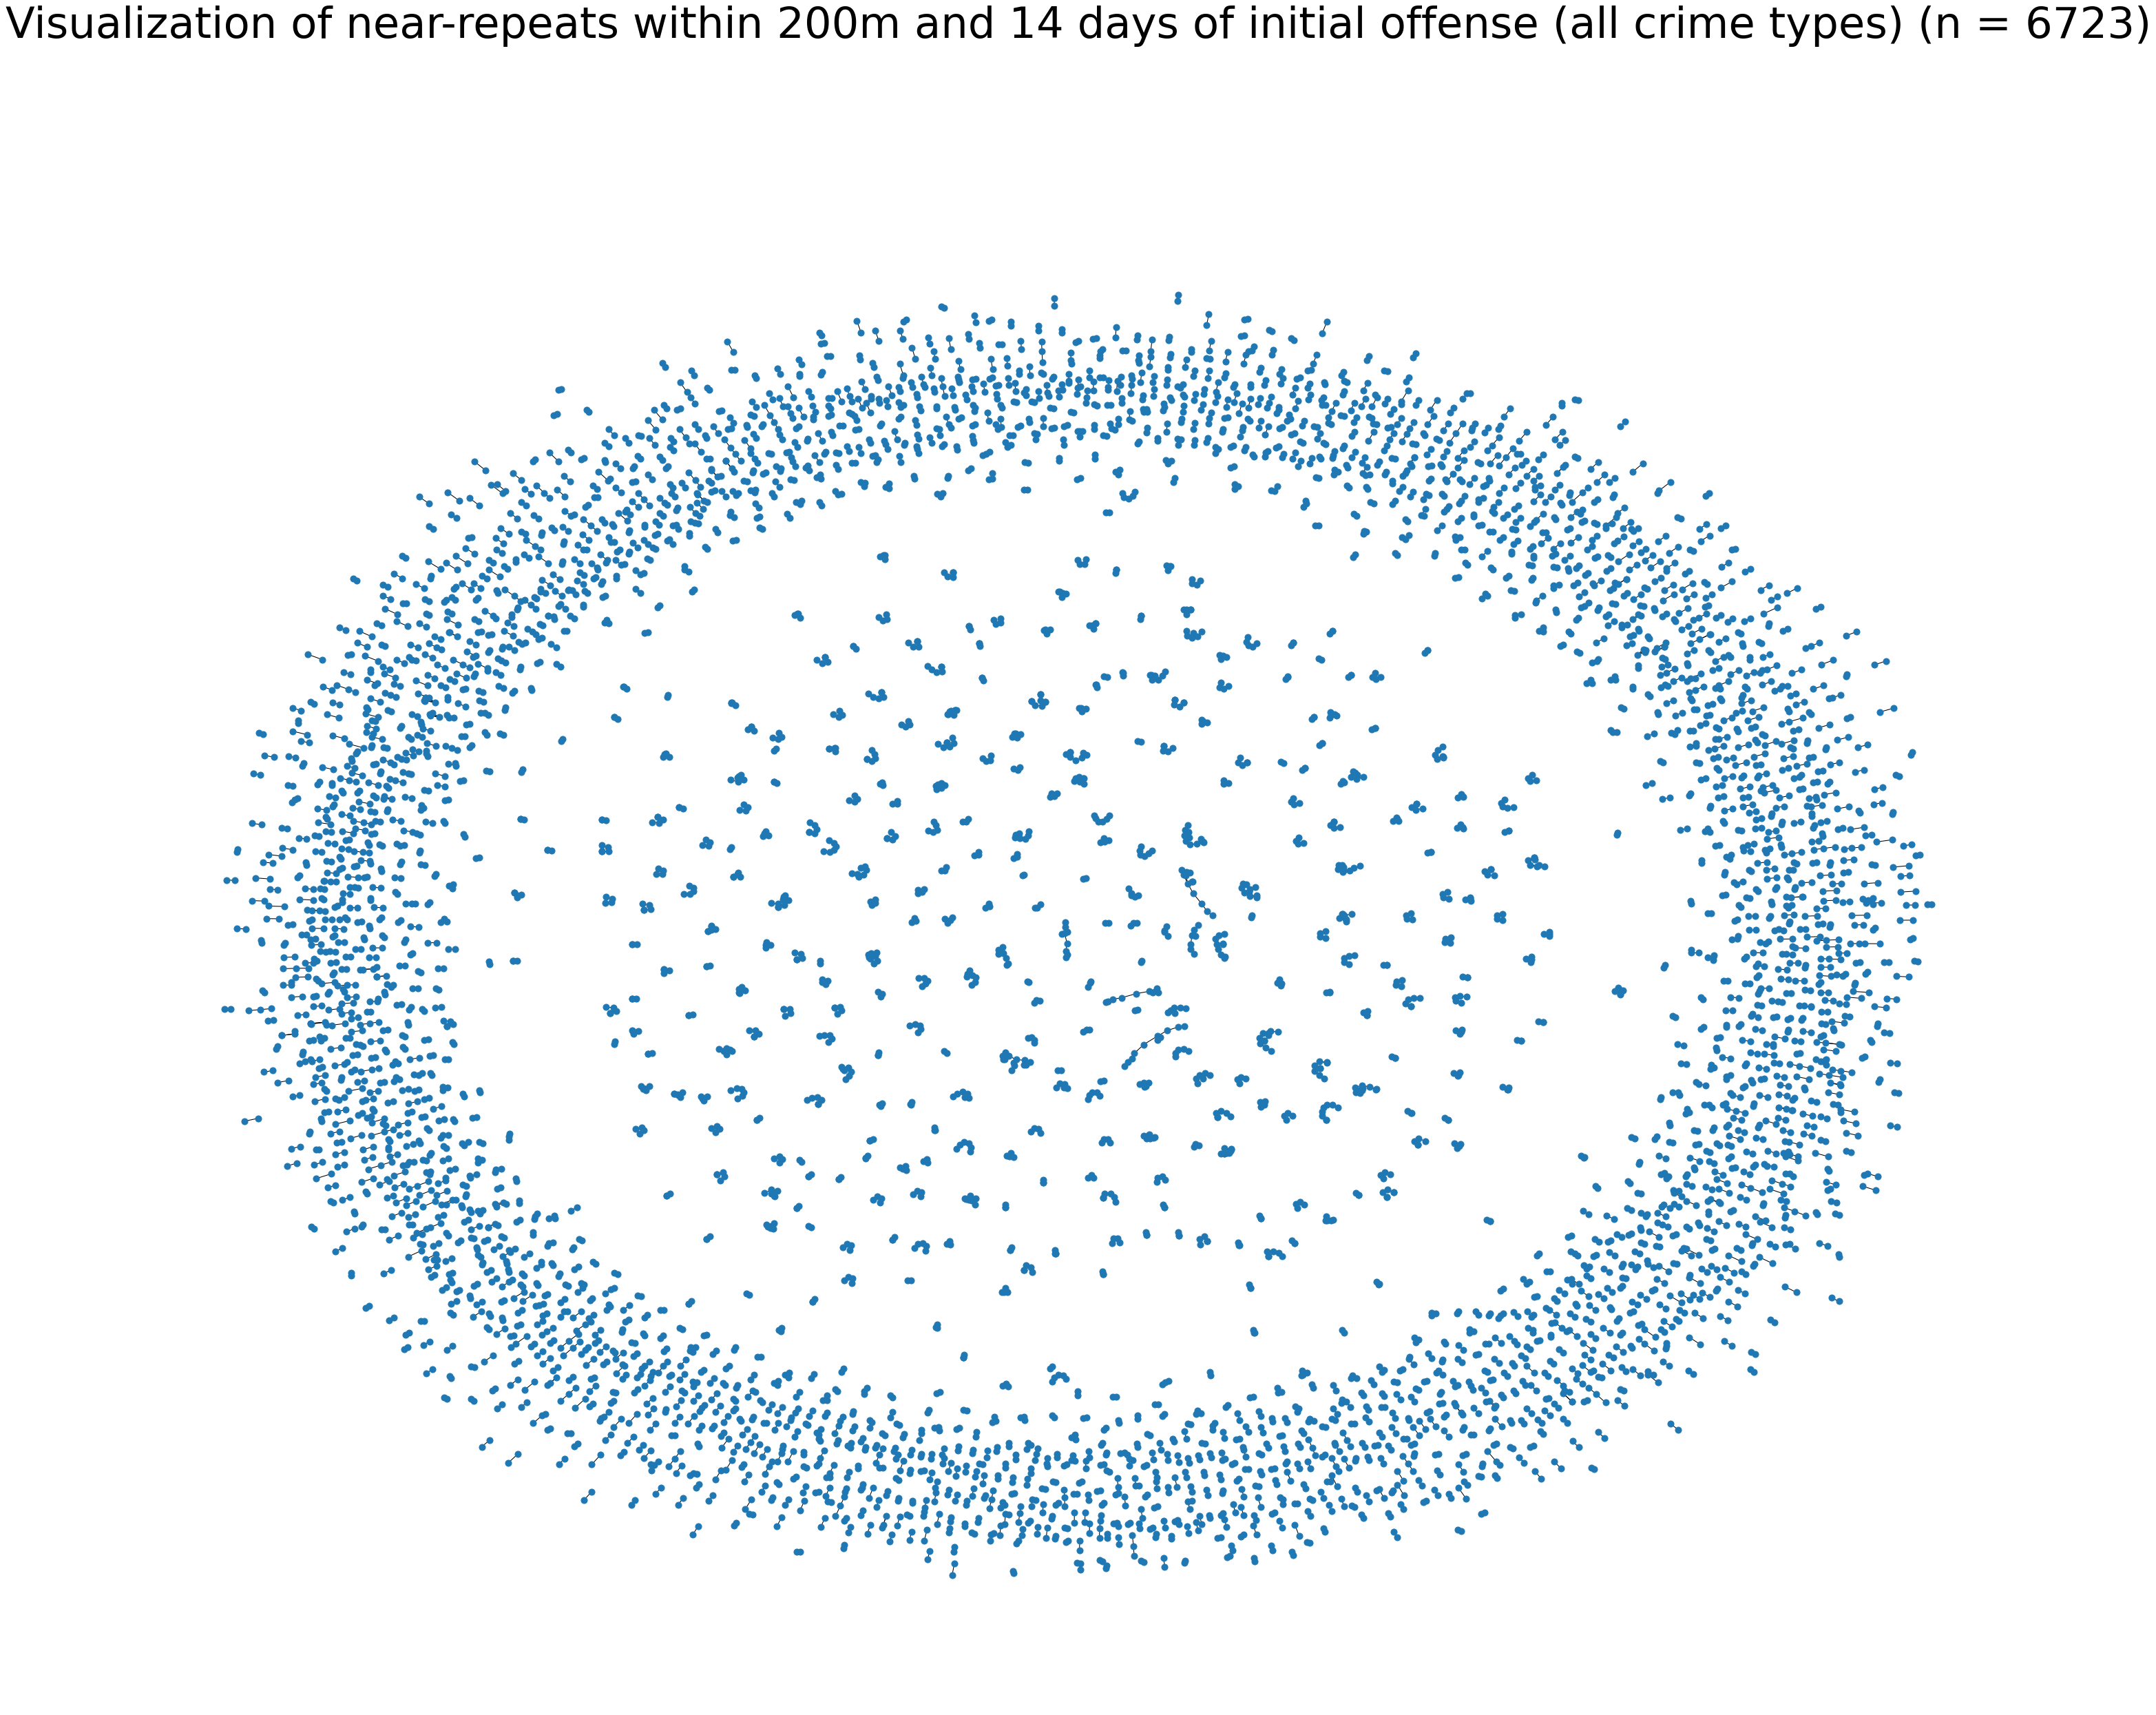

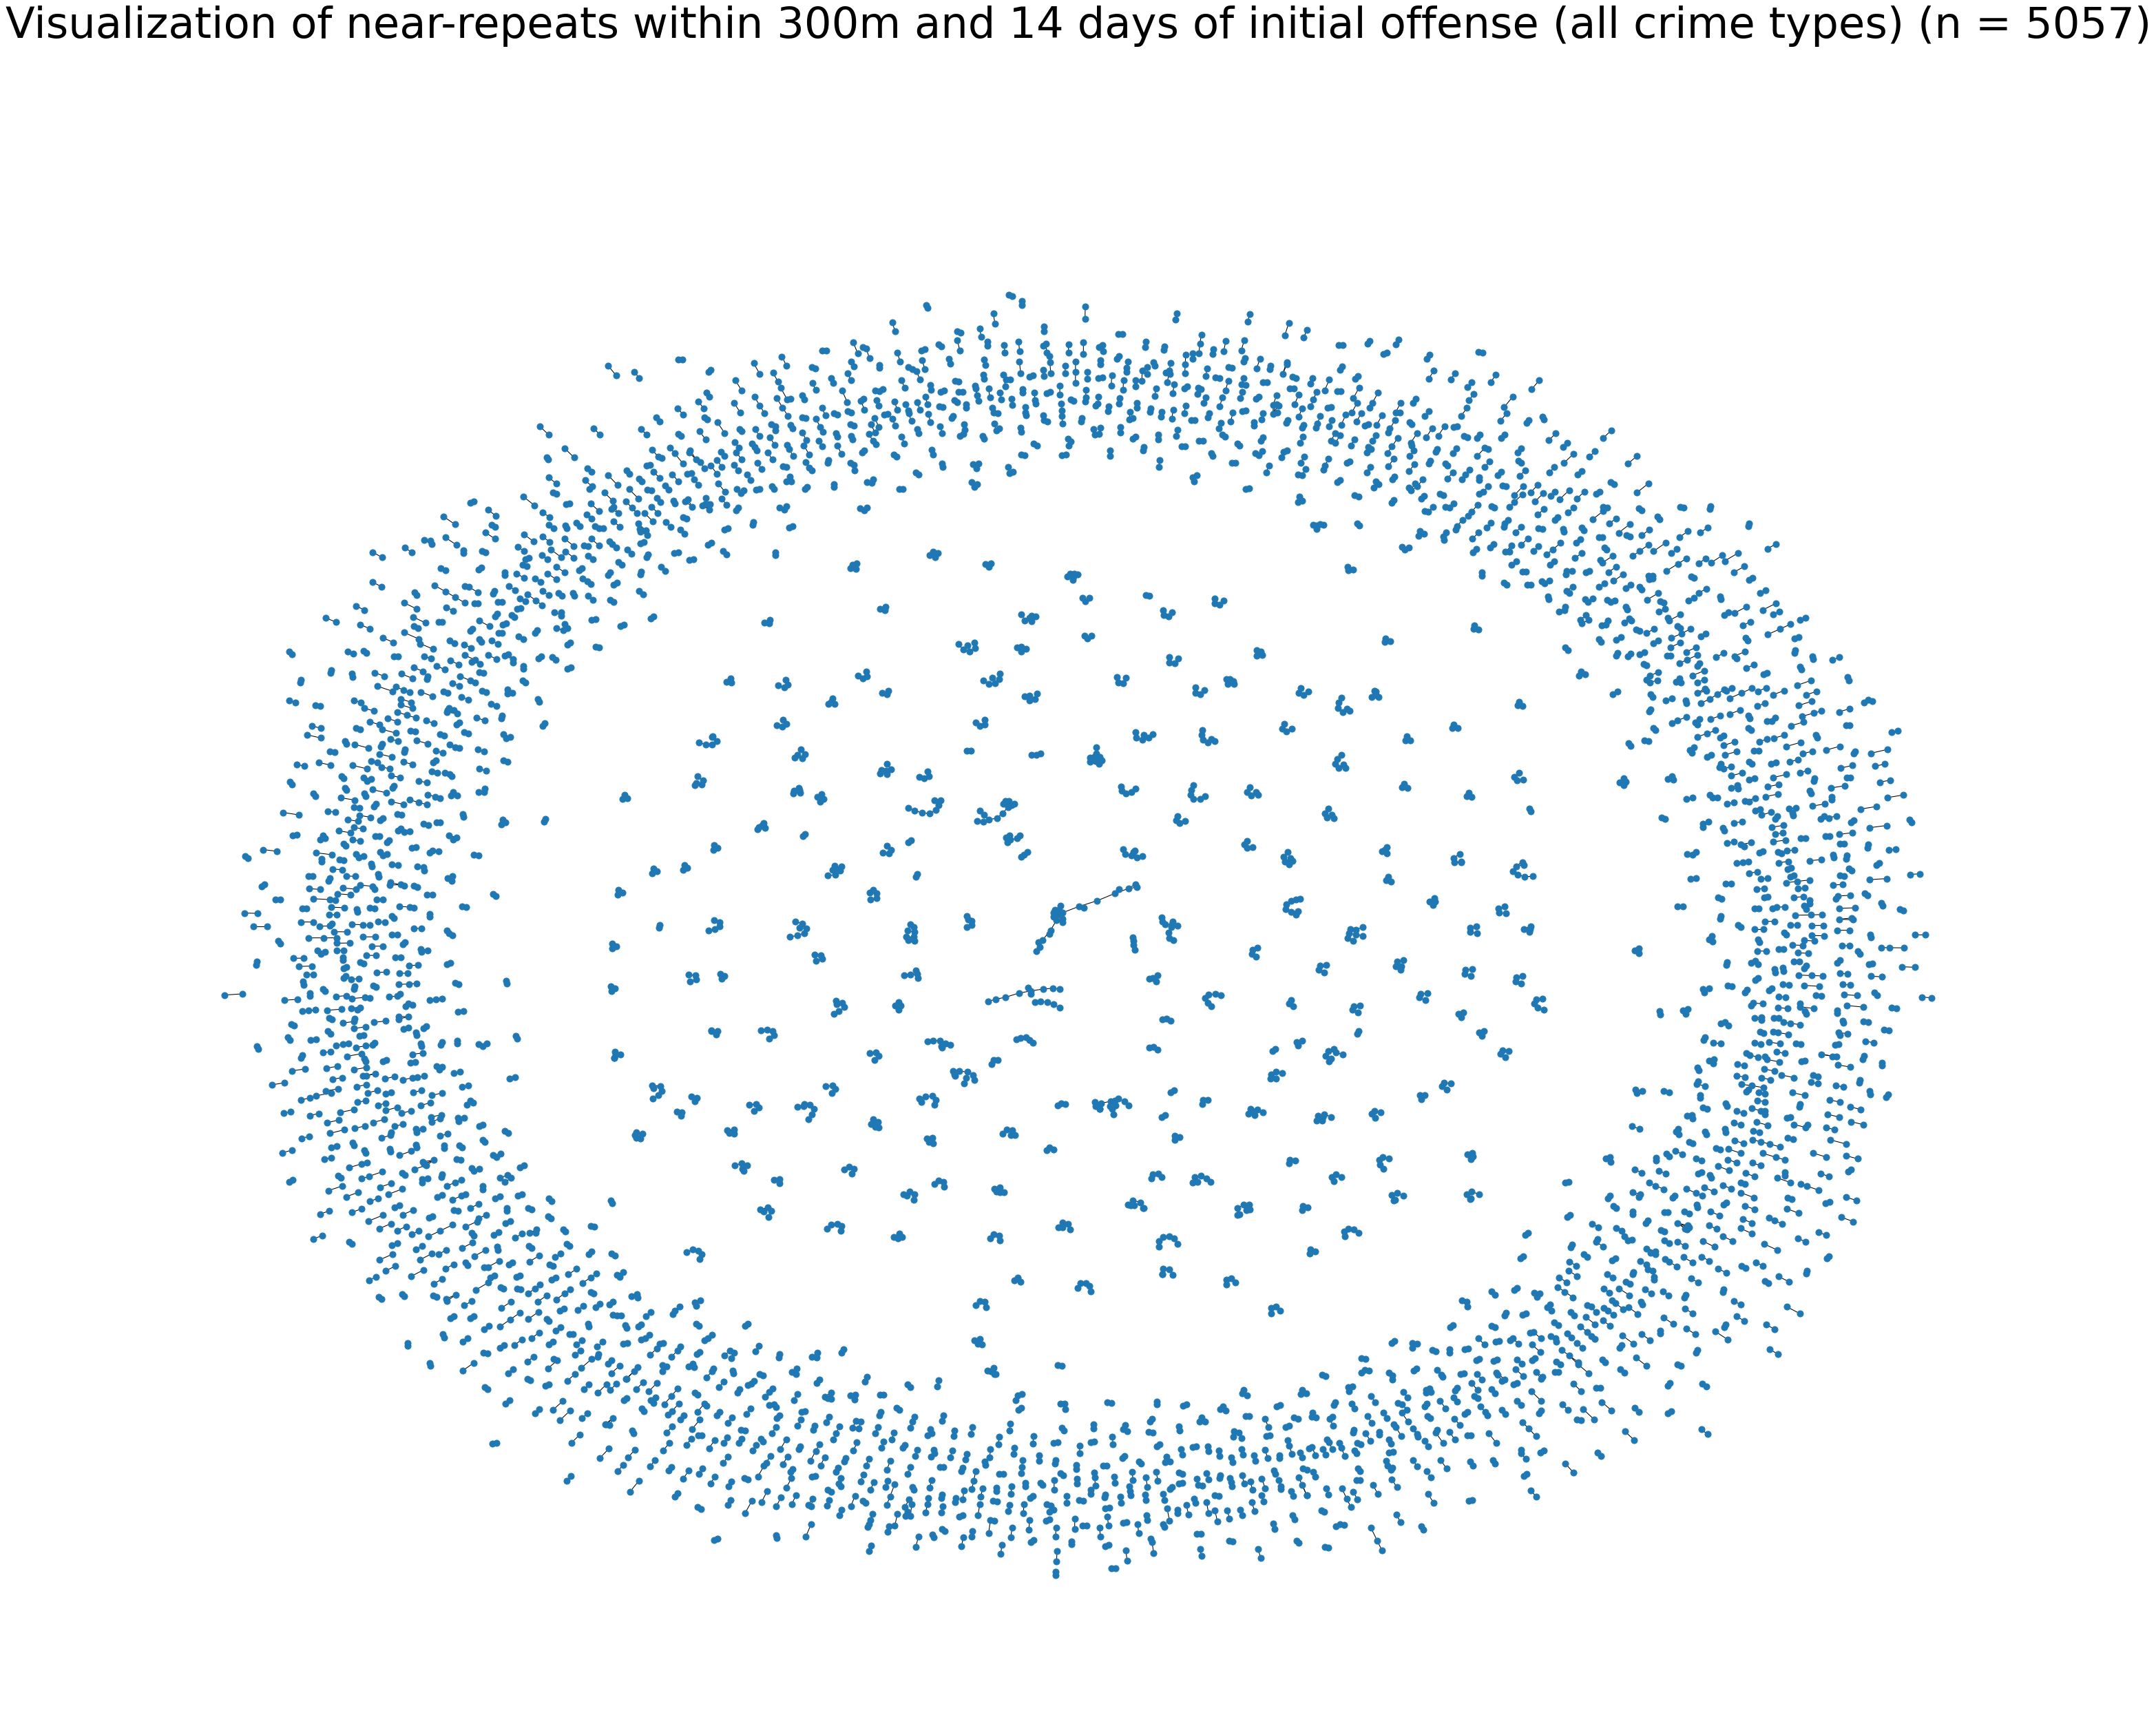

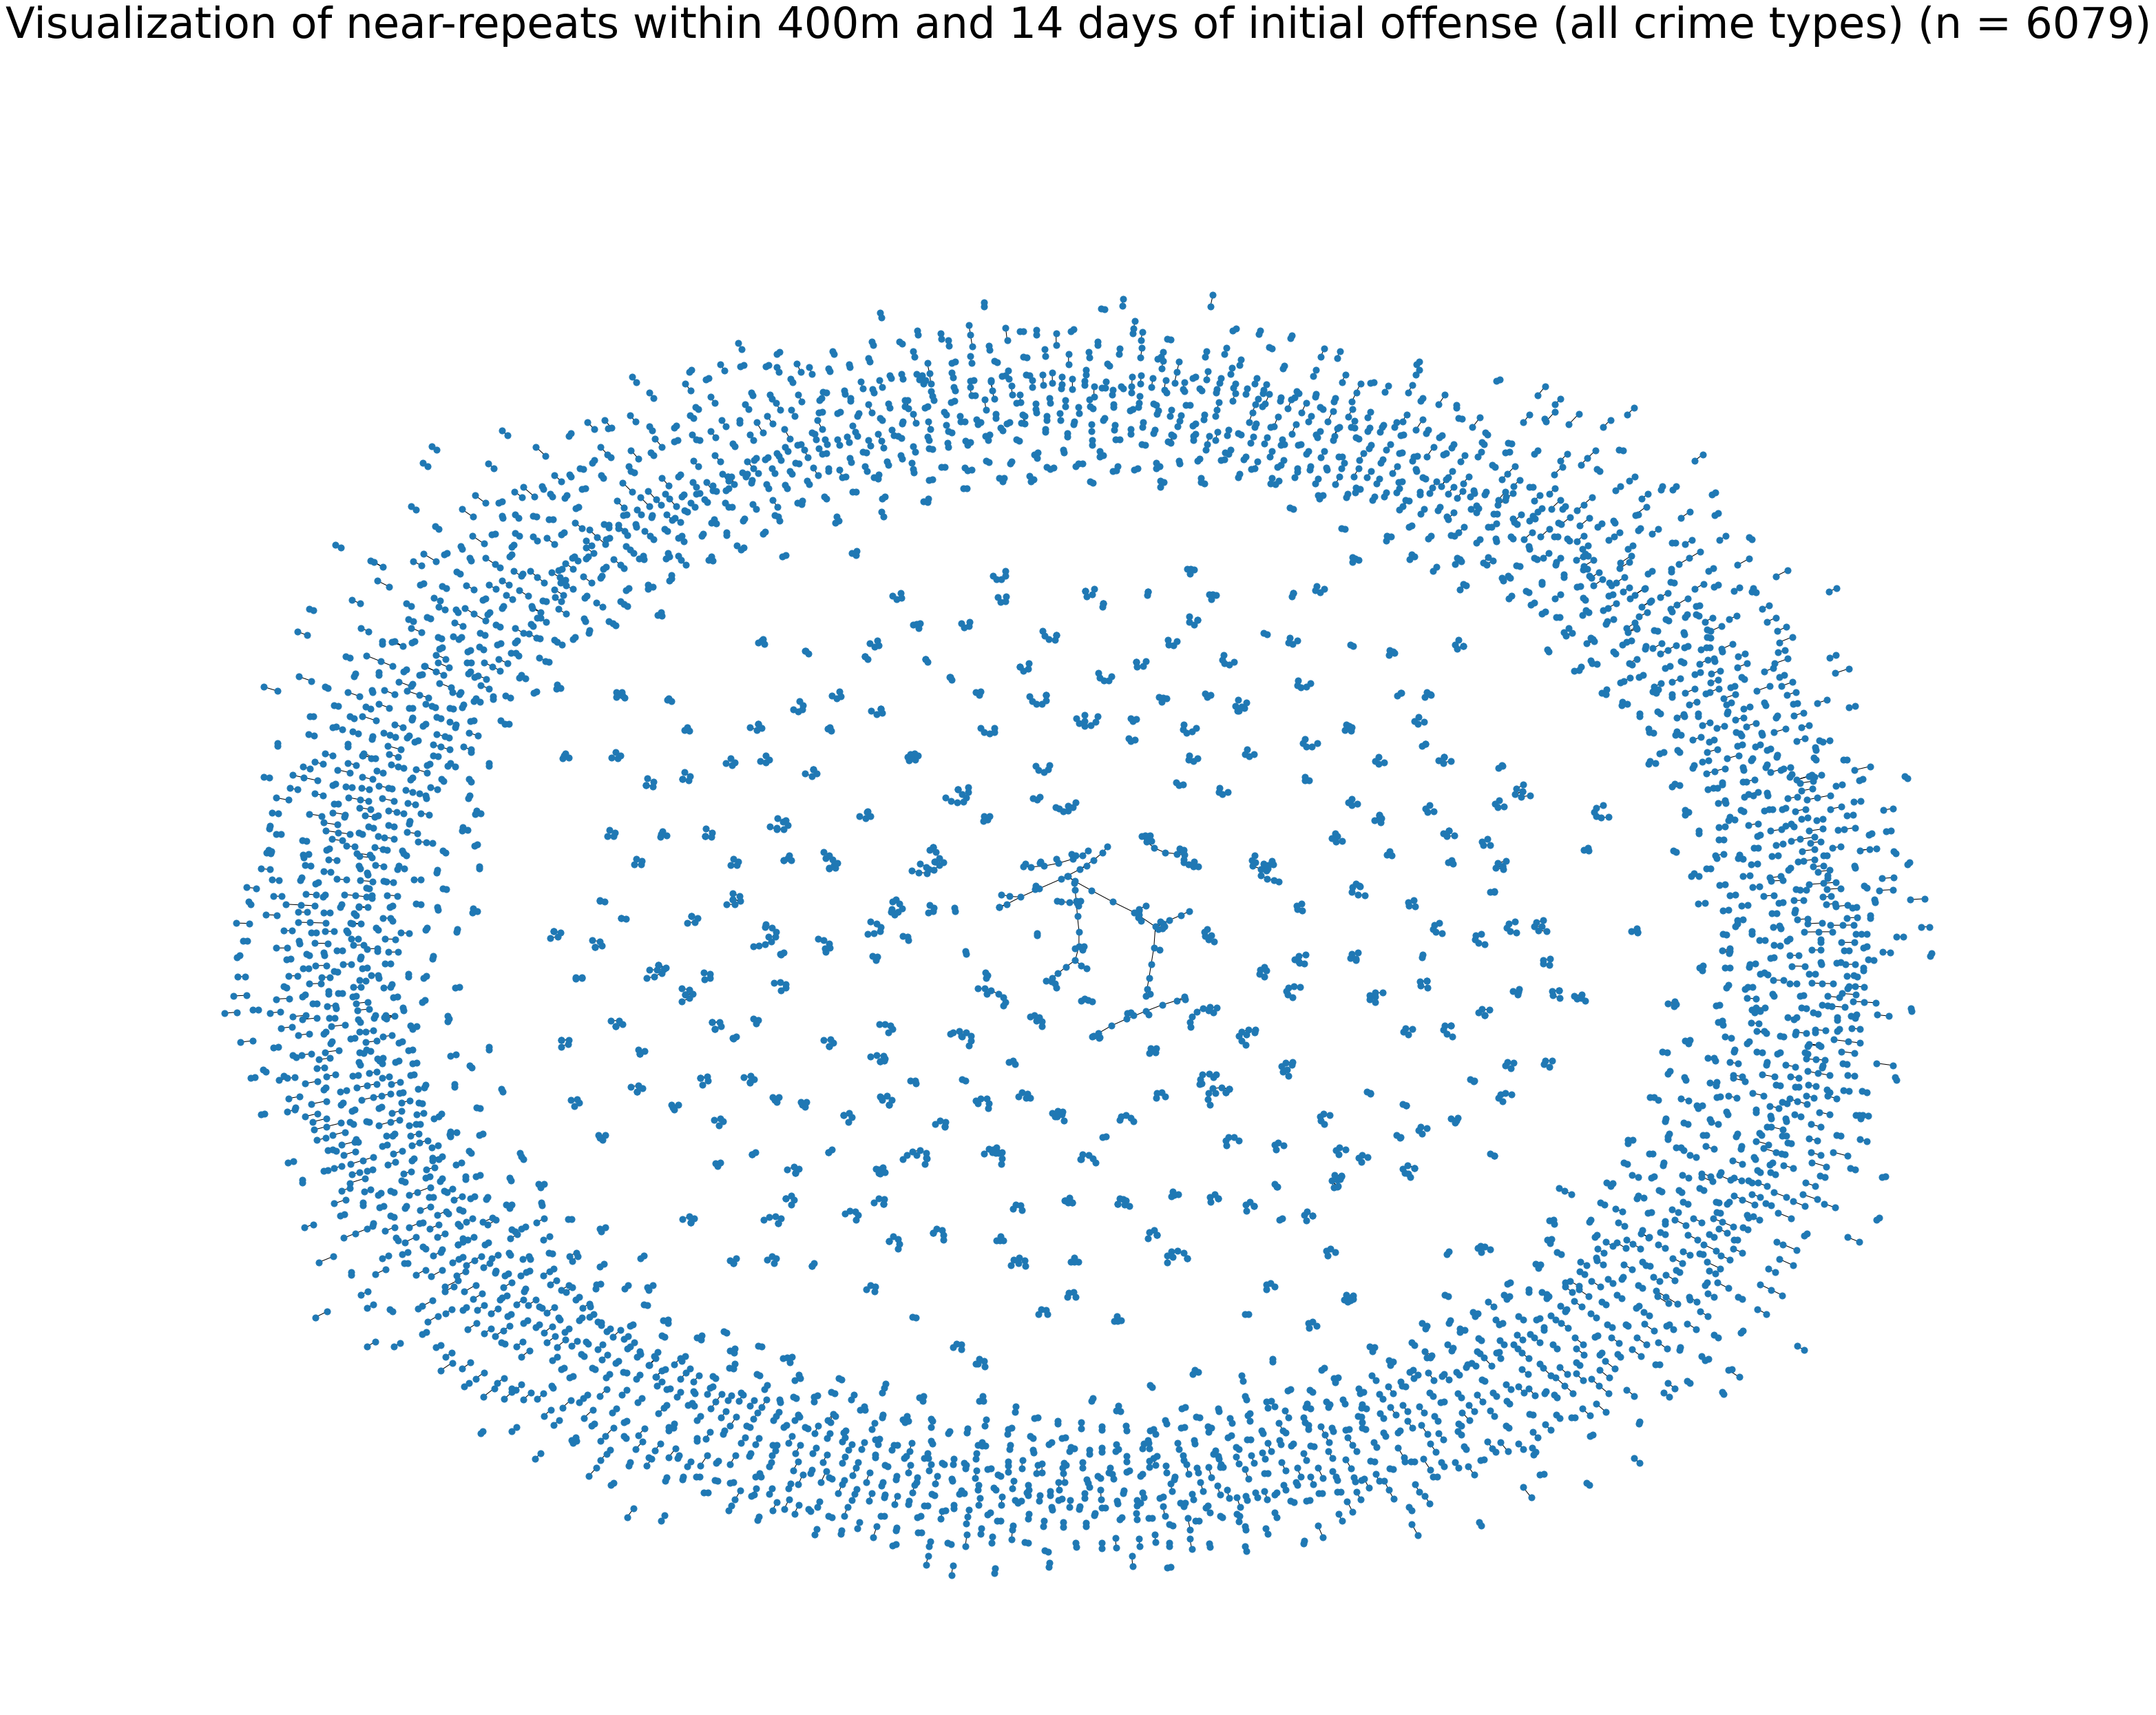

Time elapsed: 314.6821348667145s


In [57]:
# time (mac: ~4-5min | win:)
import time
s = time.time()

for distance in proximity_distance:
    keys_to_extract = [i for i in dict_graph.keys() if str(distance) in i]   
    dict_graph_subset = {key: dict_graph[key] for key in keys_to_extract}
    
    G = nx.compose_all(list(dict_graph_subset.values()))
    
    title = f'Visualization of near-repeats within {distance}m and 14 days of initial offense (combined crimes)'
    dict_graph_combined[f'14d_{distance}'] = G
    
    draw_network(G, title)
    
e = time.time()
print(f'Time elapsed: {e-s}s')

## 4.3. Create network for each type of burglary
combines all distances

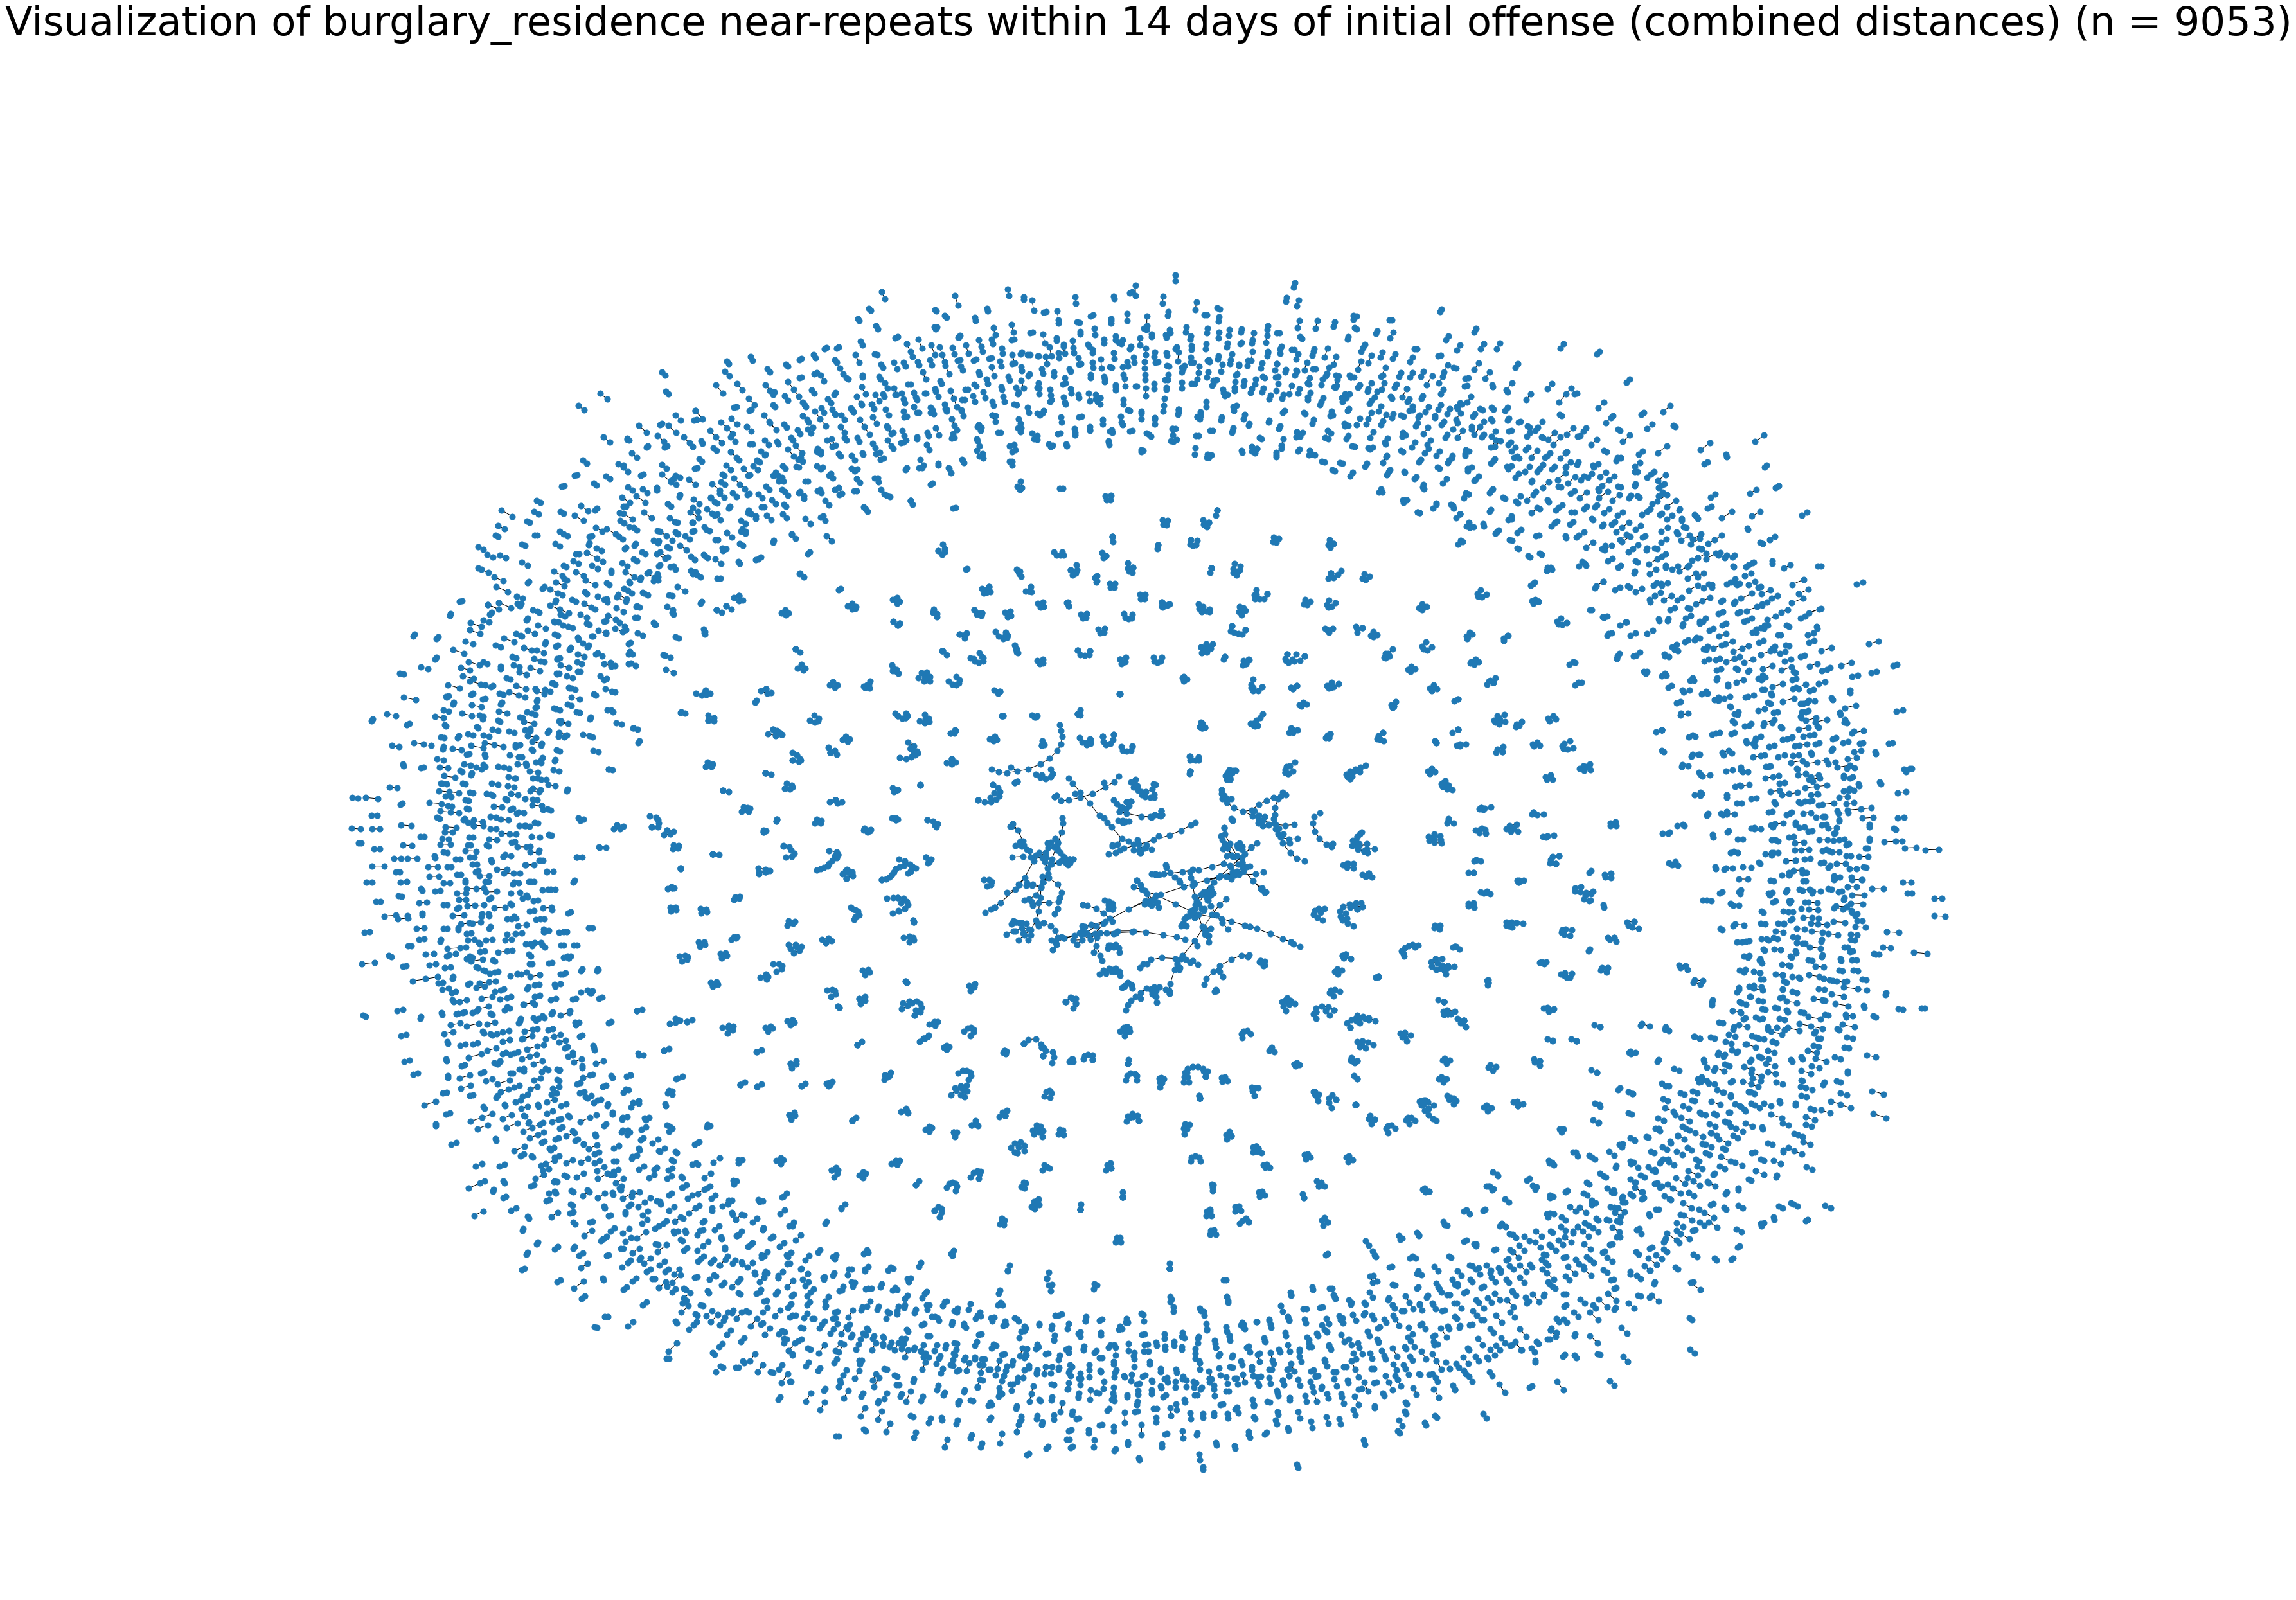

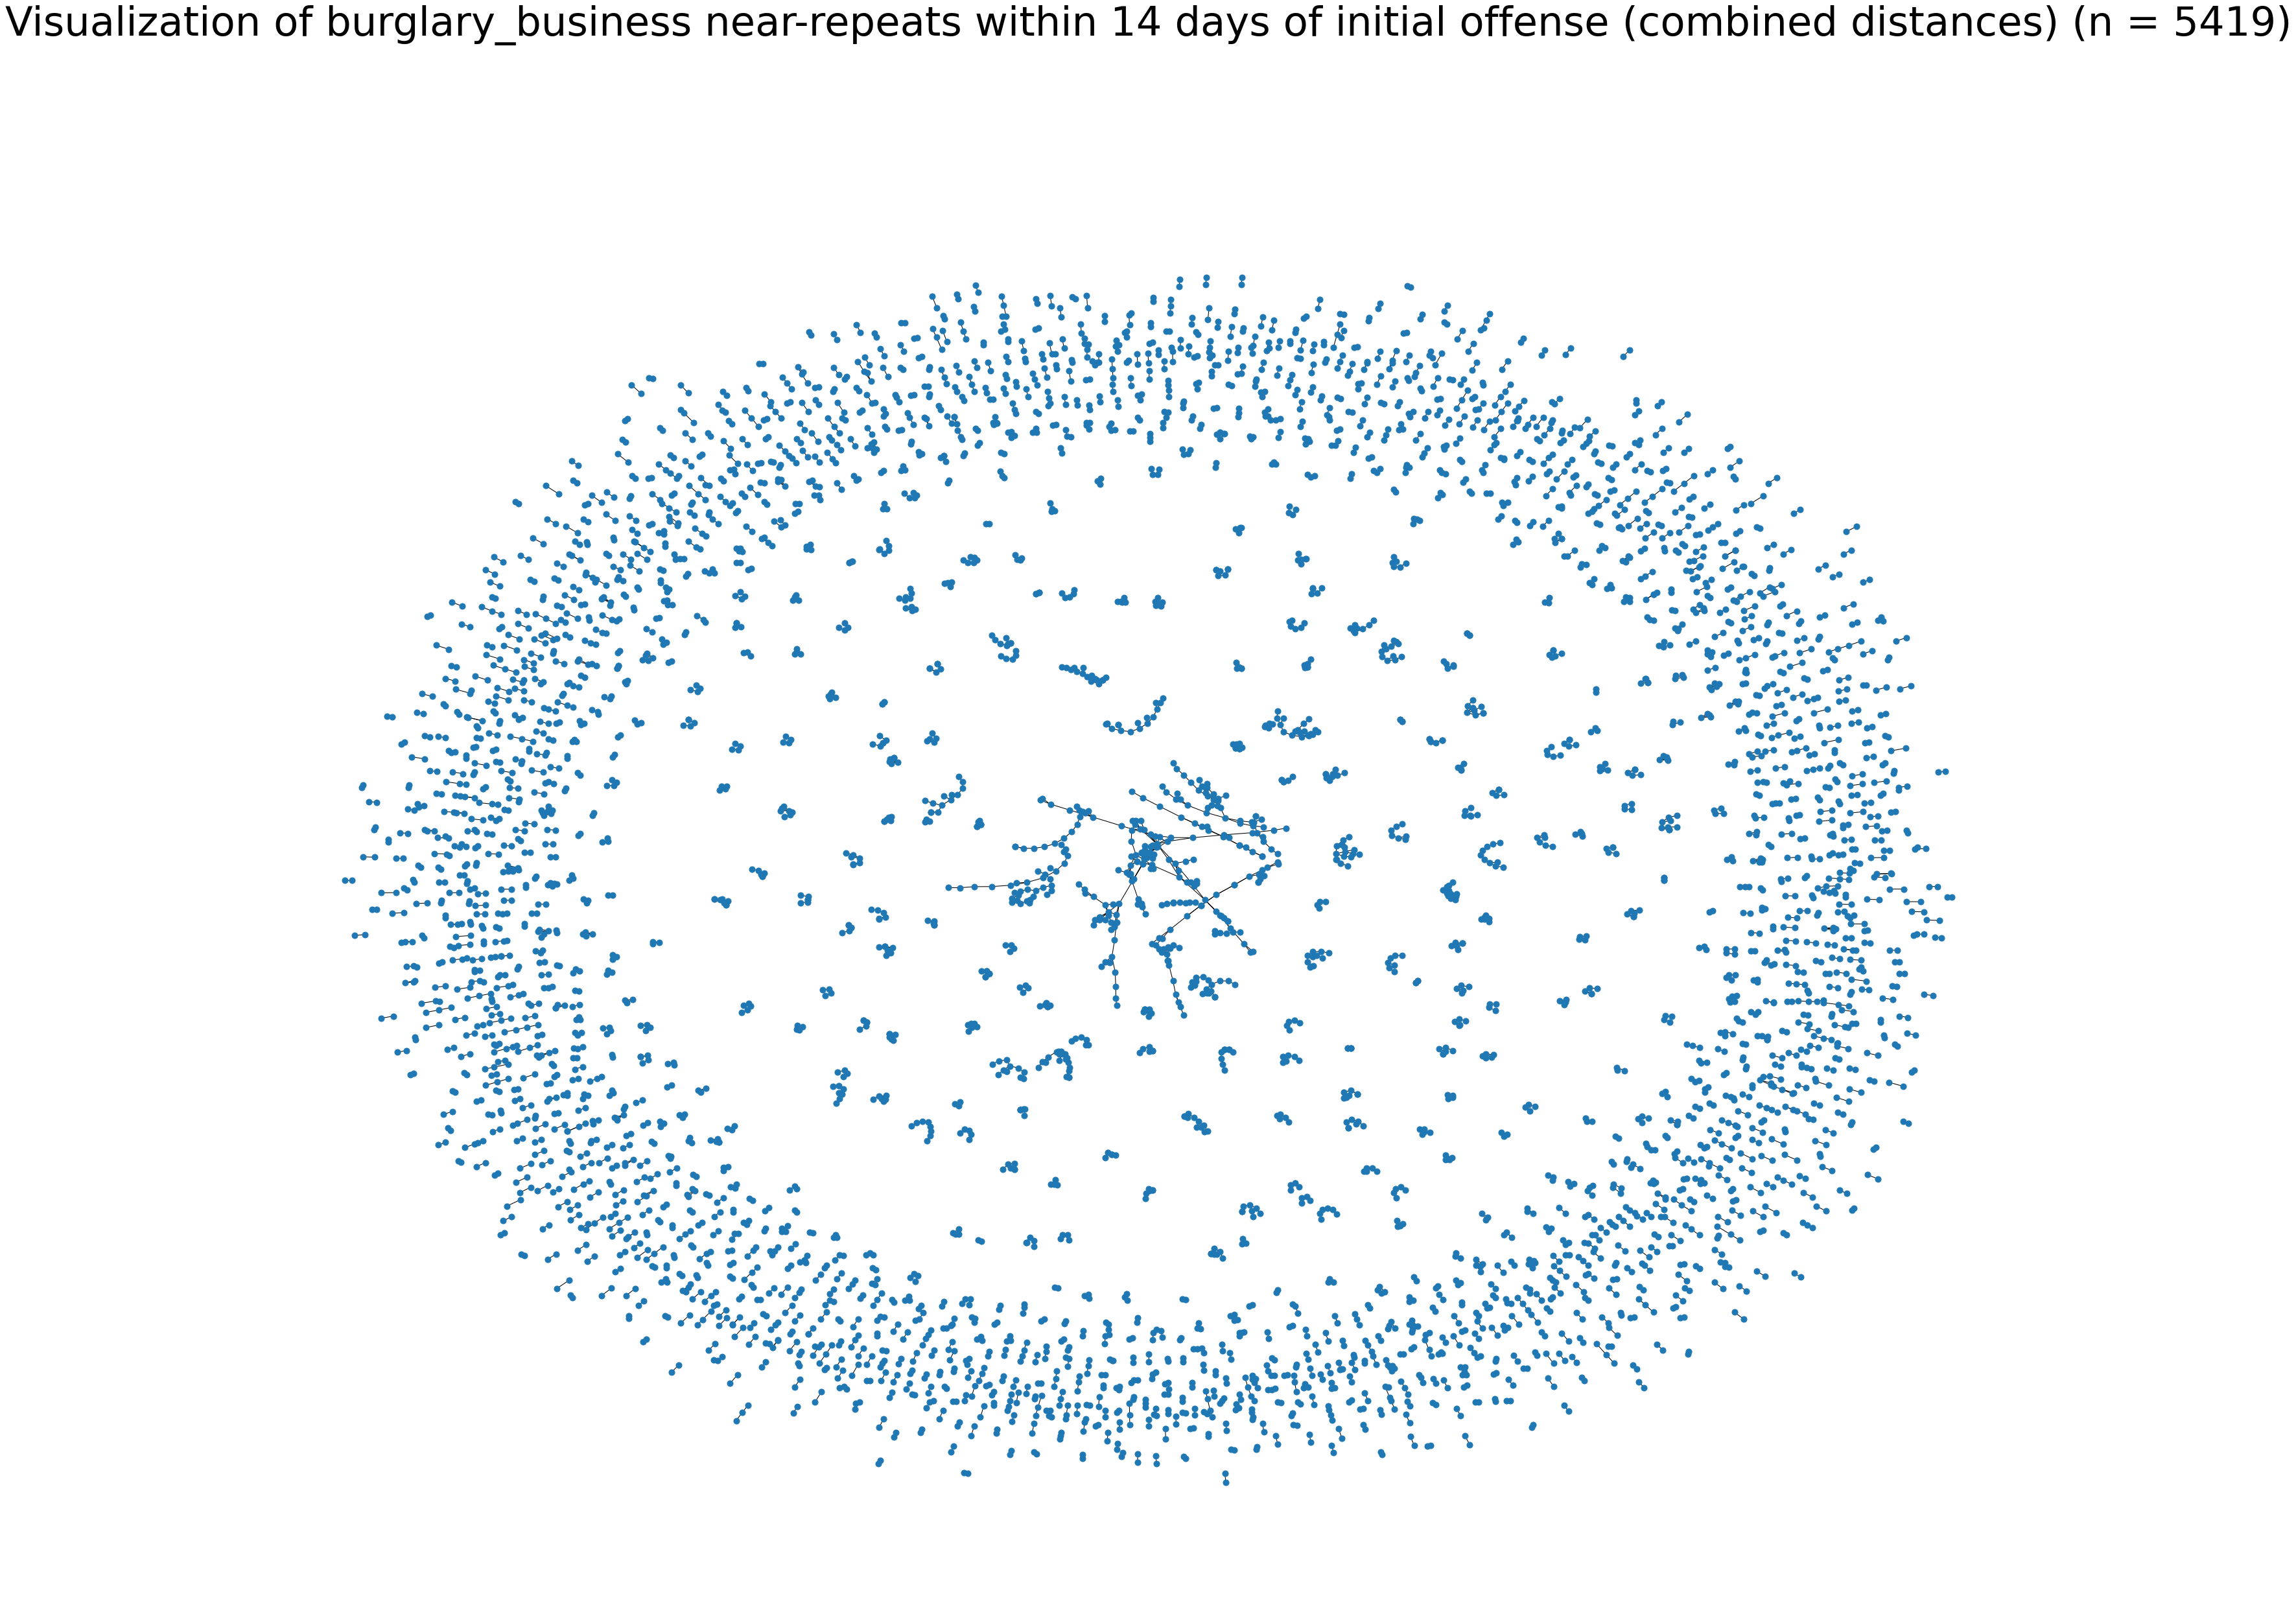

Time elapsed: 287.4986708164215s


In [59]:
# time (mac: ~5min | win:)
import time
s = time.time()

for crime in crime_groups:
    keys_to_extract = [i for i in dict_graph.keys() if crime in i]   
    dict_graph_subset = {key: dict_graph[key] for key in keys_to_extract}
    
    G = nx.compose_all(list(dict_graph_subset.values()))
    
    title = f'Visualization of {crime} near-repeats within 14 days of initial offense (combined distances)'
    dict_graph_combined[f'14d_{crime}'] = G
    
    draw_network(G, title)
    
e = time.time()
print(f'Time elapsed: {e-s}s')

## 4.4. Create combined network for all offenses and distances

{'14d_200m': <networkx.classes.graph.Graph object at 0x7fc4d7041f40>, '14d_300m': <networkx.classes.graph.Graph object at 0x7fc4bf952280>, '14d_400m': <networkx.classes.graph.Graph object at 0x7fc4d959a100>}


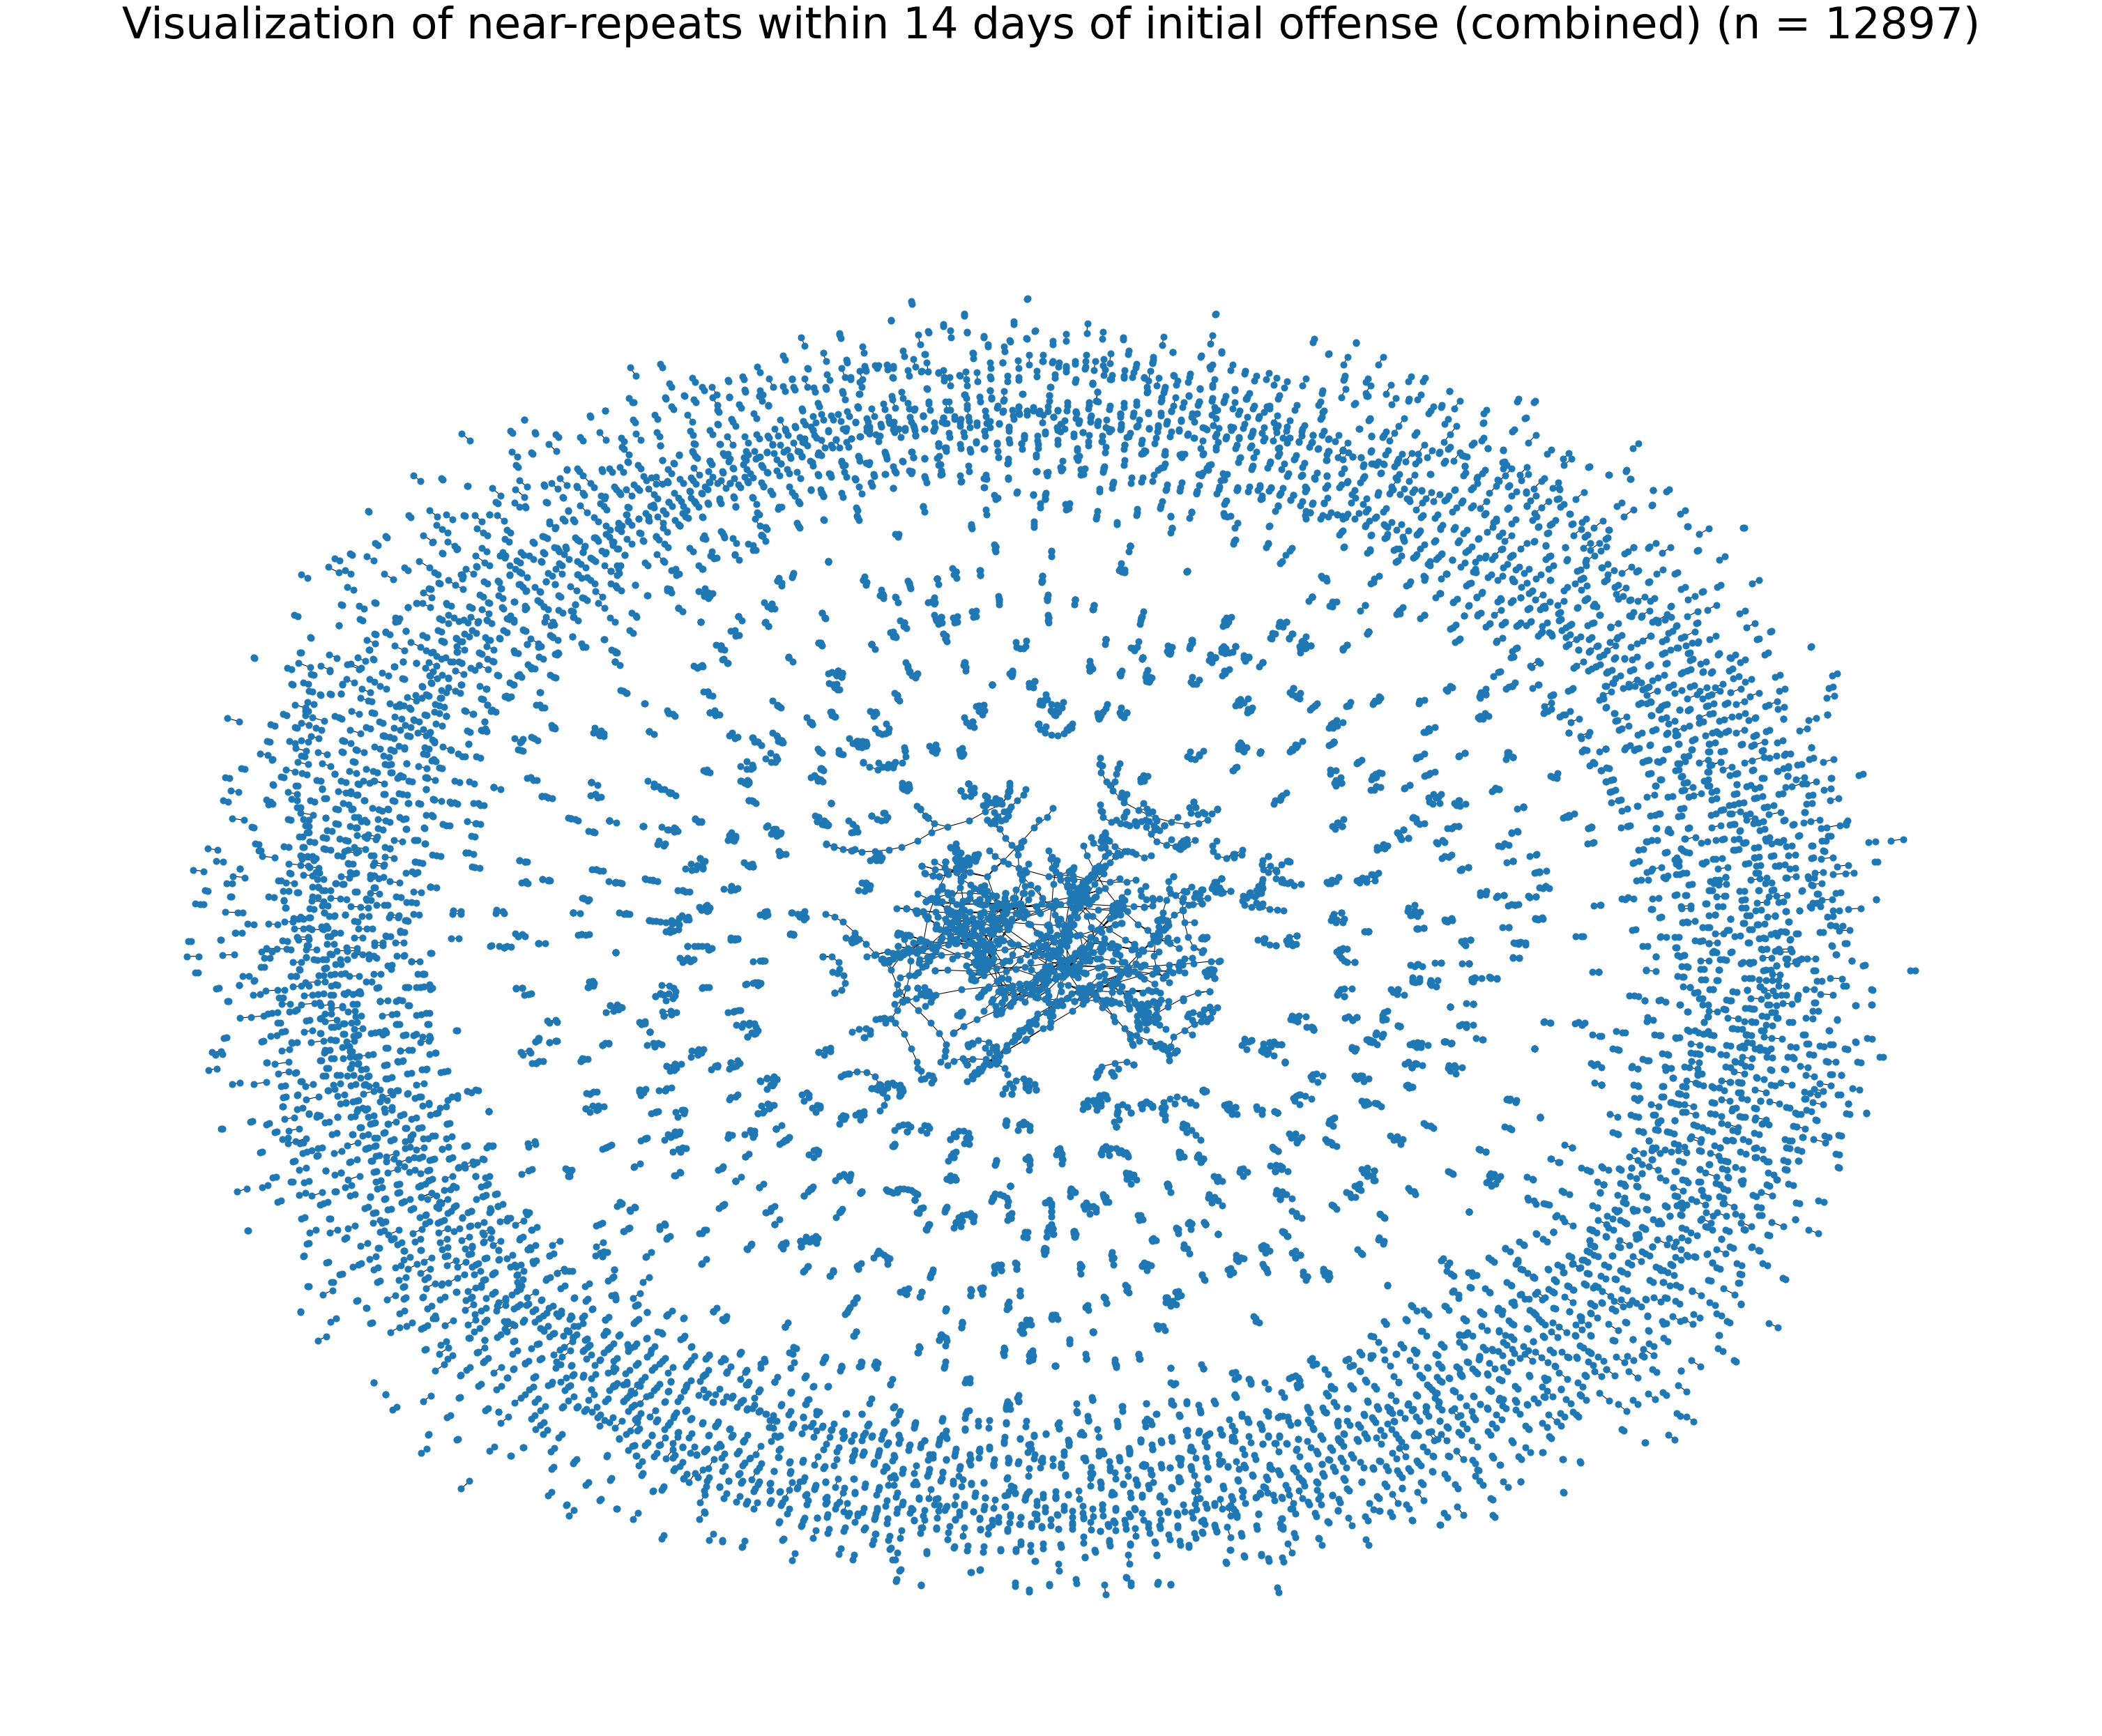

Time elapsed: 412.43515491485596s


In [61]:
# time (mac: ~7min | win:)
import time
s = time.time()

keys_to_extract = [i for i in dict_graph_combined.keys() if 'burglary' not in i]   
dict_graph_subset = {key: dict_graph_combined[key] for key in keys_to_extract}

G = nx.compose_all(list(dict_graph_subset.values()))
dict_graph_combined[f'14d_master'] = G

title = f'Visualization of near-repeats within 14 days of initial offense (combined)'
draw_network(G, title)
    
e = time.time()
print(f'Time elapsed: {e-s}s')

----
# 5. Network properties
TODO: description

In [60]:
# create dataframe for output of network properties
index_tuple_list = []

for crime in crime_groups:
    for time in proximity_time:
        for distance in proximity_distance:
            index_tuples = (crime, time, distance)
            index_tuple_list.append(index_tuples)
            

print(index_tuple_list)

index = pd.MultiIndex.from_tuples(index_tuple_list)
df_np = pd.DataFrame(columns=list_network_properties_headers, index=index)
df_np

[('burglary_business', 14, 200), ('burglary_business', 14, 300), ('burglary_business', 14, 400), ('burglary_residence', 14, 200), ('burglary_residence', 14, 300), ('burglary_residence', 14, 400)]


centrality centrality_degree centrality_eigenvector  \
burglary_business  14 200        NaN               NaN                    NaN   
                      300        NaN               NaN                    NaN   
                      400        NaN               NaN                    NaN   
burglary_residence 14 200        NaN               NaN                    NaN   
                      300        NaN               NaN                    NaN   
                      400        NaN               NaN                    NaN   

                          centrality_closeness centrality_betweenness  \
burglary_business  14 200                  NaN                    NaN   
                      300                  NaN                    NaN   
                      400                  NaN                    NaN   
burglary_residence 14 200                  NaN                    NaN   
                      300                  NaN                    NaN   
                      400                  NaN                    NaN   

                          clustering_coefficient assortativity  
burglary_business  14 200                    NaN           NaN  
                      300                    NaN           NaN  
                      400                    NaN           NaN  
burglary_residence 14 200                    NaN           NaN  
                      300                    NaN           NaN  
                      400                    NaN           NaN

In [43]:
df_np.loc[('burglary_business', 14, 200)]['centrality'] = 5

In [61]:
def calc_network_prop(index, graph):
    print(f'index tup: {index}')
    df_temp = df_np.loc[(index)]
    df_temp['centrality_degree'] = nx.degree_centrality(graph)
    df_temp['centrality_eigenvector'] = nx.eigenvector_centrality(graph)
    df_temp['centrality_closeness'] = nx.closeness_centrality(graph)
    df_temp['centrality_betweenness'] = nx.betweenness_centrality(graph)
    df_temp['clustering_coefficient'] = nx.clustering(graph)
    df_temp['assortativity'] = nx.degree_assortativity_coefficient(graph)

In [62]:
for crime in crime_groups:
    for time in proximity_time:
        for distance in proximity_distance:
            index_tuple = (crime, time, distance)
            print(f'Temp: {index_tuple}')
            calc_network_prop(index_tuple, dict_graph[f'{crime}_14d_{distance}m'])

Temp: ('burglary_business', 14, 200)
index tup: ('burglary_business', 14, 200)
Temp: ('burglary_business', 14, 300)
index tup: ('burglary_business', 14, 300)


PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

## 5.1. Test: assortativity

In [ ]:
for distance in proximity_distance:
    

## TEST: Highlight single node by highest value of property

In [135]:
abc = nx.eigenvector_centrality(dict_graph[f'burglary_business_14d_200m'])

In [136]:
abc

{20168813: 1.3733915560900655e-08,
 20168963: 2.378783953834075e-08,
 20168722: 1.3733915560900655e-08,
 201612527: 1.3733915560900655e-08,
 201617304: 2.937361698481868e-15,
 201613255: 2.937361698481868e-15,
 201626012: 3.0652973034470893e-11,
 201640513: 4.334985019240551e-11,
 201625468: 2.937361698481868e-15,
 201623676: 2.937361698481868e-15,
 201632070: 2.937361698481868e-15,
 20168307: 2.937361698481868e-15,
 201635815: 3.0652973034470893e-11,
 201647022: 2.937361698481868e-15,
 201625777: 2.937361698481868e-15,
 201651695: 2.937361698481868e-15,
 201627577: 2.937361698481868e-15,
 201657161: 2.937361698481868e-15,
 2016129309: 2.937361698481868e-15,
 201662949: 2.937361698481868e-15,
 201643576: 2.937361698481868e-15,
 201665053: 2.937361698481868e-15,
 201652960: 2.937361698481868e-15,
 201666694: 2.937361698481868e-15,
 201644824: 2.937361698481868e-15,
 201669044: 4.334985019240551e-11,
 201654684: 3.0652973034470893e-11,
 201670386: 2.937361698481868e-15,
 201670478: 2.937

In [137]:
len(abc)

2740

In [143]:
for x, y in abc.items():
    print(f'{x}, {y}')

20168813, 1.3733915560900655e-08
20168963, 2.378783953834075e-08
20168722, 1.3733915560900655e-08
201612527, 1.3733915560900655e-08
201617304, 2.937361698481868e-15
201613255, 2.937361698481868e-15
201626012, 3.0652973034470893e-11
201640513, 4.334985019240551e-11
201625468, 2.937361698481868e-15
201623676, 2.937361698481868e-15
201632070, 2.937361698481868e-15
20168307, 2.937361698481868e-15
201635815, 3.0652973034470893e-11
201647022, 2.937361698481868e-15
201625777, 2.937361698481868e-15
201651695, 2.937361698481868e-15
201627577, 2.937361698481868e-15
201657161, 2.937361698481868e-15
2016129309, 2.937361698481868e-15
201662949, 2.937361698481868e-15
201643576, 2.937361698481868e-15
201665053, 2.937361698481868e-15
201652960, 2.937361698481868e-15
201666694, 2.937361698481868e-15
201644824, 2.937361698481868e-15
201669044, 4.334985019240551e-11
201654684, 3.0652973034470893e-11
201670386, 2.937361698481868e-15
201670478, 2.937361698481868e-15
201681805, 2.937361698481868e-15
2016753

2020643783, 2.937361698481868e-15
2020647577, 2.937361698481868e-15
2020629136, 2.937361698481868e-15
202192909, 3.0652973034470893e-11
2020652092, 4.334985019240551e-11
2020624887, 3.0652973034470893e-11
2020651552, 2.4194237957661764e-09
2020684004, 2.937361698481868e-15
2020675210, 2.937361698481868e-15
2020653506, 2.937361698481868e-15
2020628804, 2.937361698481868e-15
2020657680, 2.937361698481868e-15
2020639494, 2.937361698481868e-15
2020657727, 3.0652973034470893e-11
2020662014, 3.0652973034470893e-11
2020663117, 2.937361698481868e-15
2020656996, 2.937361698481868e-15
2020673029, 2.937361698481868e-15
2020646858, 2.937361698481868e-15
2020663992, 4.334985019240551e-11
2020645732, 3.0652973034470893e-11
2020665204, 2.937361698481868e-15
2020640585, 2.937361698481868e-15
2020666206, 2.937361698481868e-15
2020654134, 2.937361698481868e-15
2020666463, 2.937361698481868e-15
2020666518, 2.937361698481868e-15
2020676025, 2.937361698481868e-15
2020653019, 2.937361698481868e-15
202067071

In [139]:
max(abc.values())

0.7070778985404496

In [140]:
xyz = list(abc.keys())[list(abc.values()).index(max(abc.values()))]
print(xyz)

20206006490


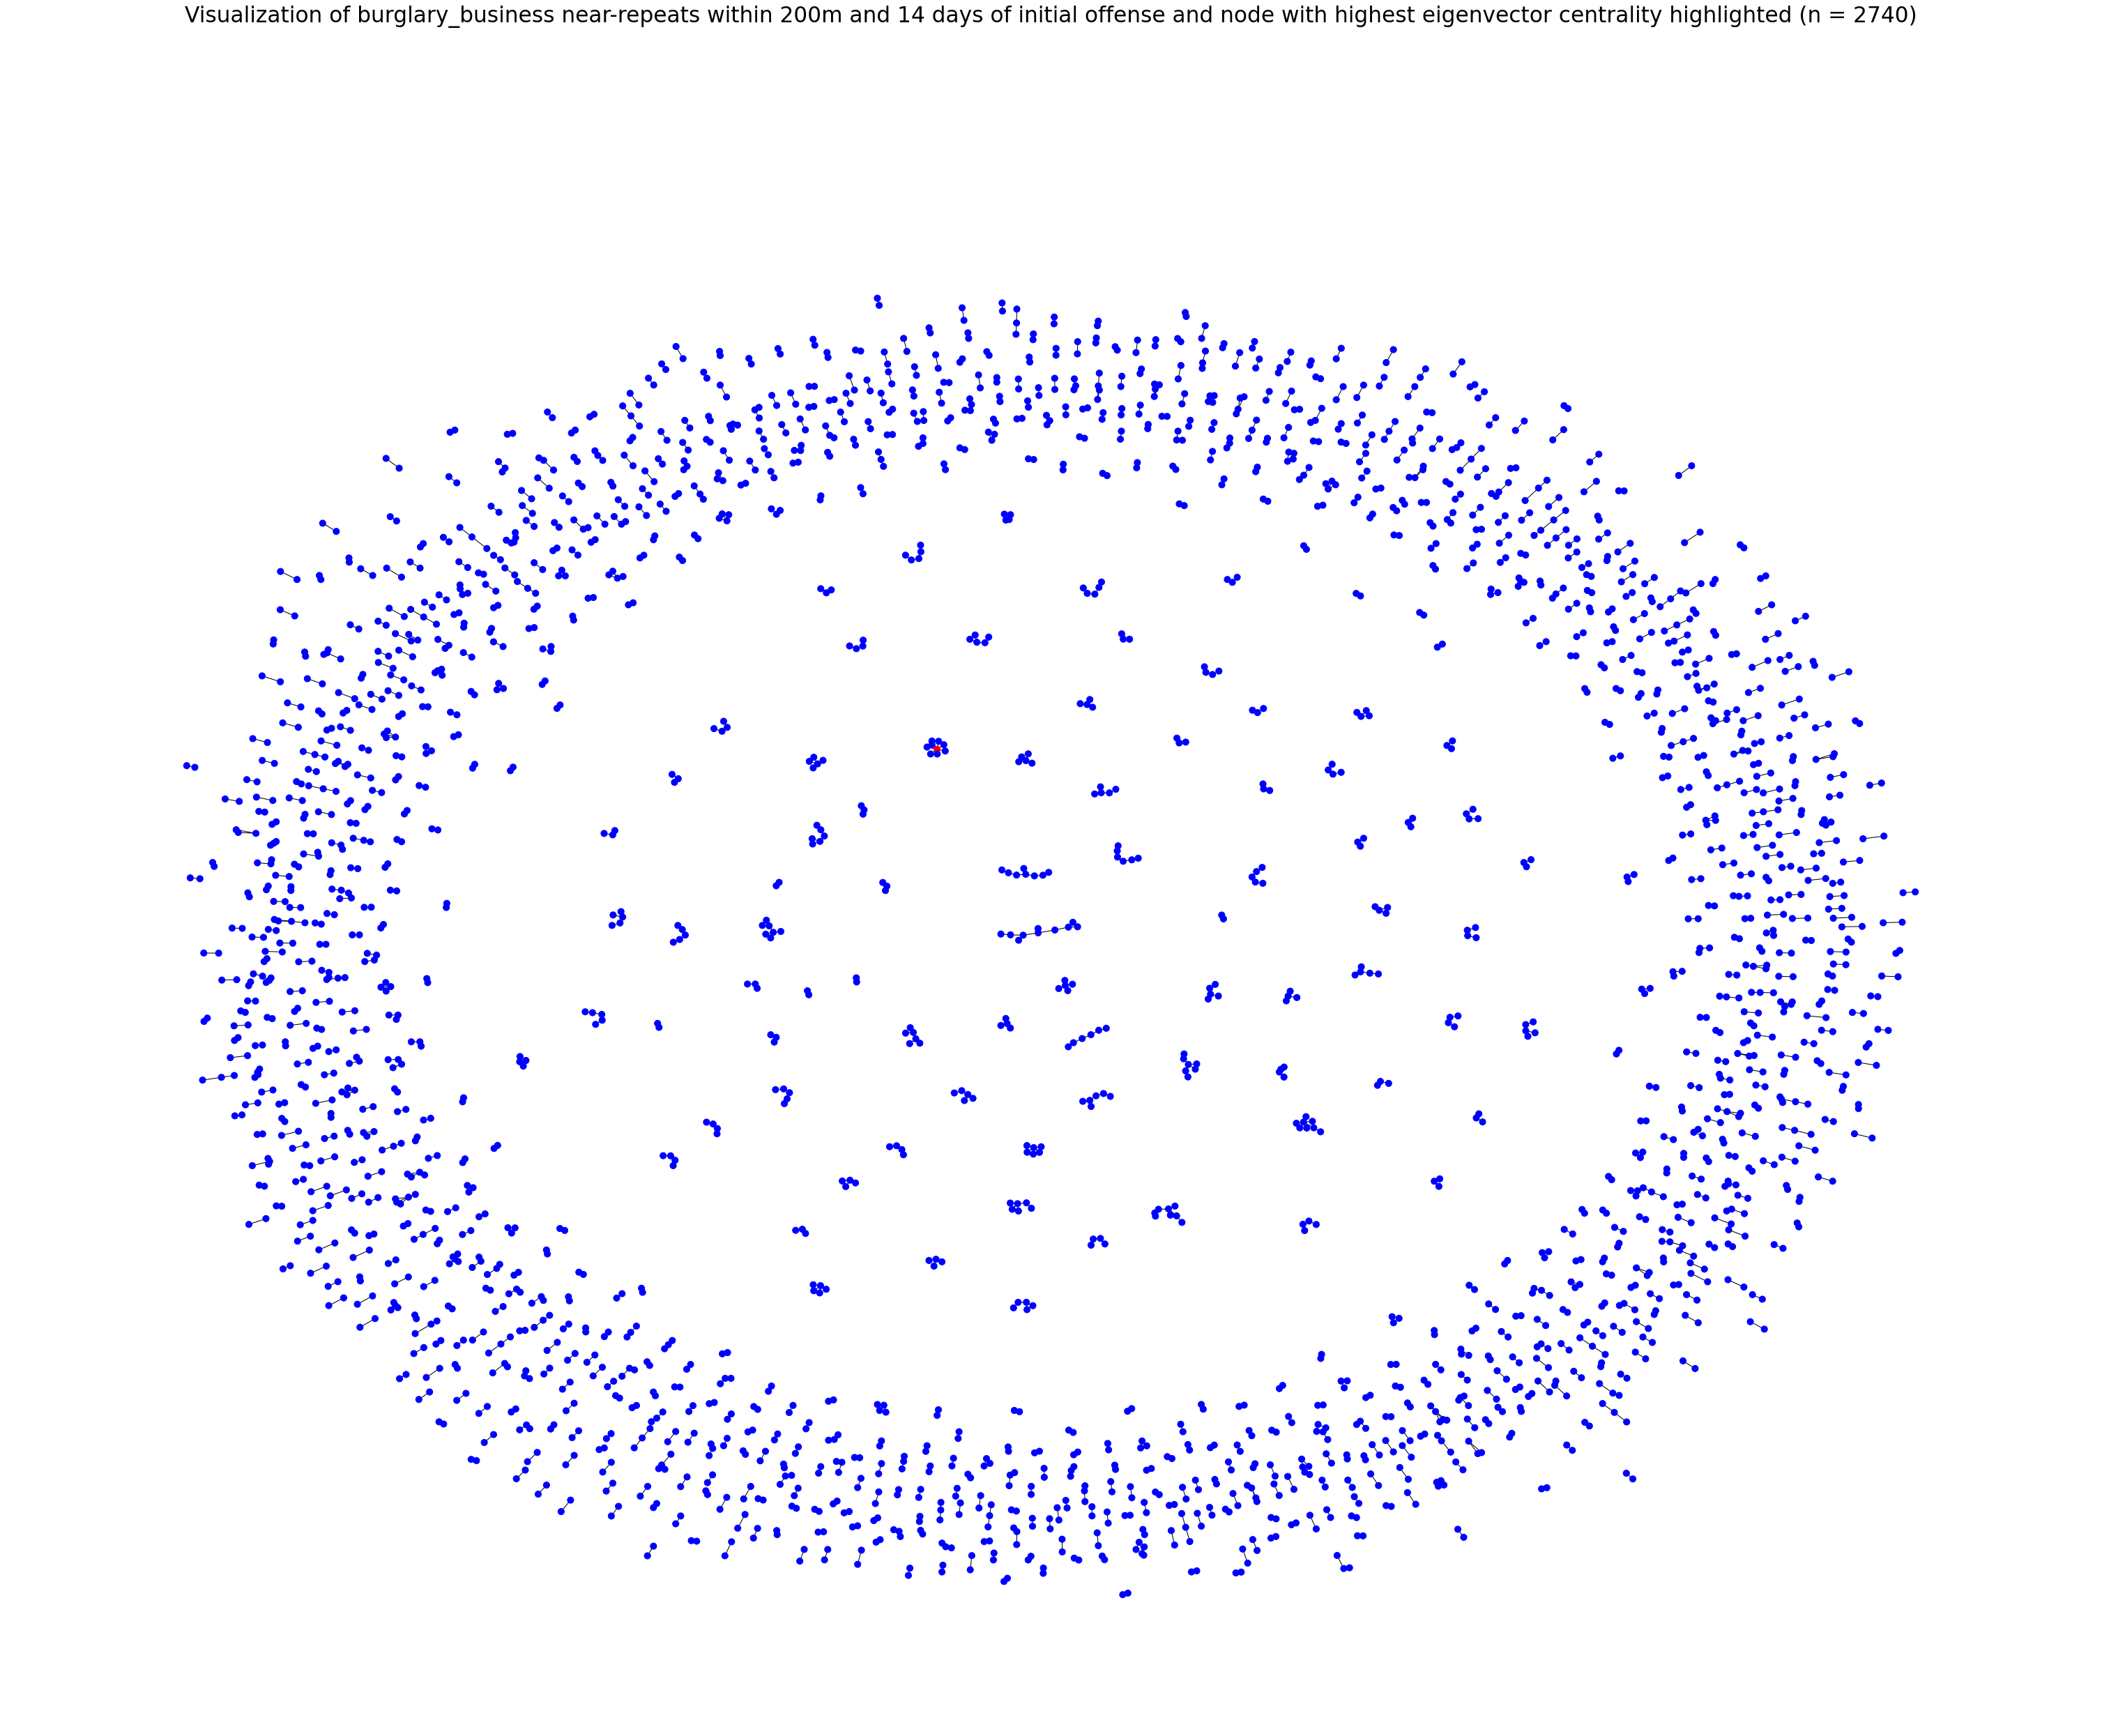

In [153]:
cm = []
G_test = dict_graph[f'burglary_business_14d_200m']
fig = plt.figure(1, figsize=(figsize_width, figsize_height), dpi=75)

for n in G_test.nodes():
    if n == xyz:
        cm.append('red')
    else:
        cm.append('blue')
        
nx.draw(G_test, with_labels=label, node_size=nodesize, width=width, node_color=cm)
fig.suptitle((f'Visualization of burglary_business near-repeats within 200m and 14 days of initial offense and node with highest eigenvector centrality highlighted (n = {G_test.number_of_nodes()})'), fontsize=30, y=1.1, ha="center")

# nx.draw(G_test.subgraph(xyz), node_size=nodesize, node_color=cm)
plt.show()

In [94]:
nx.closeness_centrality(G_test)

{20168722: 0.0021470746108427268,
 20168963: 0.00322061191626409,
 201612527: 0.0021470746108427268,
 201635815: 0.001610305958132045,
 201640513: 0.001610305958132045,
 201657161: 0.001610305958132045,
 2016129309: 0.001610305958132045,
 201662949: 0.001610305958132045,
 201643576: 0.001610305958132045,
 201682574: 0.001610305958132045,
 201676561: 0.001610305958132045,
 201693023: 0.001610305958132045,
 201675347: 0.001610305958132045,
 2016103508: 0.001610305958132045,
 2016103967: 0.001610305958132045,
 2016116784: 0.001610305958132045,
 2016115918: 0.001610305958132045,
 2016127094: 0.001610305958132045,
 2016164127: 0.001610305958132045,
 2016201667: 0.0051529790660225444,
 2016121995: 0.0042941492216854536,
 2016192032: 0.0028627661477903022,
 2016259485: 0.00322061191626409,
 2016755493: 0.0021470746108427268,
 2016184508: 0.00322061191626409,
 2016166839: 0.00322061191626409,
 2016206025: 0.0021470746108427268,
 2016171046: 0.001610305958132045,
 2016166414: 0.0016103059581320

In [95]:
nx.betweenness_centrality(G_test)

{20168722: 0.0,
 20168963: 5.194535348813049e-06,
 201612527: 0.0,
 201635815: 0.0,
 201640513: 0.0,
 201657161: 0.0,
 2016129309: 0.0,
 201662949: 0.0,
 201643576: 0.0,
 201682574: 0.0,
 201676561: 0.0,
 201693023: 0.0,
 201675347: 0.0,
 2016103508: 0.0,
 2016103967: 0.0,
 2016116784: 0.0,
 2016115918: 0.0,
 2016127094: 0.0,
 2016164127: 0.0,
 2016201667: 2.5972676744065244e-05,
 2016121995: 1.5583606046439148e-05,
 2016192032: 0.0,
 2016259485: 0.0,
 2016755493: 0.0,
 2016184508: 5.194535348813049e-06,
 2016166839: 0.0,
 2016206025: 0.0,
 2016171046: 0.0,
 2016166414: 0.0,
 2016187651: 0.0,
 2016160986: 0.0,
 2016209062: 0.0,
 2016195020: 5.194535348813049e-06,
 2016207678: 0.0,
 2016239616: 0.0,
 2016239784: 0.0,
 2016321582: 0.0,
 2016288973: 0.0,
 2016370164: 0.0,
 2016373101: 0.0,
 2016386928: 0.0,
 2016358358: 0.0,
 2016391465: 0.0,
 2016372216: 0.0,
 2016426082: 0.0,
 2016408603: 0.0,
 2016466828: 0.0,
 2016457931: 0.0,
 2016501289: 0.0,
 2016469231: 0.0,
 2016508746: 0.0,
 201

In [96]:
nx.clustering(G_test)

{20168722: 0,
 20168963: 0,
 201612527: 0,
 201635815: 0,
 201640513: 0,
 201657161: 0,
 2016129309: 0,
 201662949: 0,
 201643576: 0,
 201682574: 0,
 201676561: 0,
 201693023: 0,
 201675347: 0,
 2016103508: 0,
 2016103967: 0,
 2016116784: 0,
 2016115918: 0,
 2016127094: 0,
 2016164127: 0,
 2016201667: 0,
 2016121995: 0,
 2016192032: 0,
 2016259485: 0,
 2016755493: 0,
 2016184508: 0,
 2016166839: 0,
 2016206025: 0,
 2016171046: 0,
 2016166414: 0,
 2016187651: 0,
 2016160986: 0,
 2016209062: 0,
 2016195020: 0,
 2016207678: 0,
 2016239616: 0,
 2016239784: 0,
 2016321582: 0,
 2016288973: 0,
 2016370164: 0,
 2016373101: 0,
 2016386928: 0,
 2016358358: 0,
 2016391465: 0,
 2016372216: 0,
 2016426082: 0,
 2016408603: 0,
 2016466828: 0,
 2016457931: 0,
 2016501289: 0,
 2016469231: 0,
 2016508746: 0,
 2016477366: 0,
 2016518176: 0,
 2016494826: 0,
 2016520005: 0,
 2016517202: 0,
 2016534969: 0,
 2016547342: 0,
 2016524842: 0,
 2016495157: 0,
 2016528032: 0,
 2016505830: 0,
 2016539839: 0,
 20165

In [97]:
nx.degree_assortativity_coefficient(G_test)

-0.10061059275521402